# Analysis of the MD1 equilirium MADS runs

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
from pandas.plotting import scatter_matrix
%matplotlib inline

In [33]:
!python utils_test.py

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## SA STEP4 Calib (setup similar to the SA 0.75 and bound)

In [2]:
path='data/STEP4-MD1-calib/' #10% variance
params='param_step4-md1.csv'
model='out_step4-md1.csv'
df_model = pd.read_csv(path+model,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
              'VEGC20','VEGC21','VEGC22', \
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
              'VEGN20','VEGN21','VEGN22', 'CarbonShallow', 'CarbonDeep', \
              'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

df_param = pd.read_csv(path+params,header=None)
output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()

NPP0       NPP1       NPP2       NPP3      VEGC00       VEGC01  \
0  114.332503  11.062243  19.520041  32.628758  574.177979  1898.013208   
1  105.891313   8.556808   5.947431  33.135608  572.862610  1745.708643   
2  112.499596  10.468261  11.807583  32.930460  575.284650  1864.594714   
3   67.549057   4.427944   2.804564  33.137224  562.983698  1060.846082   
4  110.953564   8.923807   7.031984  33.124210  574.641949  1833.407910   

       VEGC02    VEGC03     VEGC10     VEGC11  ...    VEGN10    VEGN11  \
0  476.213724  8.400835  94.556384  31.878106  ...  2.483166  0.716323   
1  439.431720  8.300069  58.760101  19.900596  ...  1.544589  0.447552   
2  468.110272  8.790728  82.970644  27.966311  ...  2.179161  0.628185   
3  270.996118  6.549698   9.550443   3.377475  ...  0.251008  0.077980   
4  460.645123  8.245332  64.599901  21.876574  ...  1.697757  0.492334   

     VEGN12    VEGN20    VEGN21    VEGN22  CarbonShallow   CarbonDeep  \
0  0.539222  9.767048  0.128095  1.154967     534.952968  2719.048444   
1  0.408977  2.585688  0.033783  1.171657     925.543909  4108.943528   
2  0.488111  5.656188  0.074377  1.164833     757.082296  5029.558121   
3  0.310660  0.999735  0.013121  1.171704     774.501713  3855.687811   
4  0.422327  3.153100  0.041345  1.171254     964.230926  4694.860658   

   CarbonMineralSum  AvailableNitrogenSum  
0      15342.593537              7.648505  
1      17766.084788              2.459732  
2      18507.169807              4.251182  
3      17034.487392              0.702075  
4      18348.489099              6.575334  

[5 rows x 28 columns]

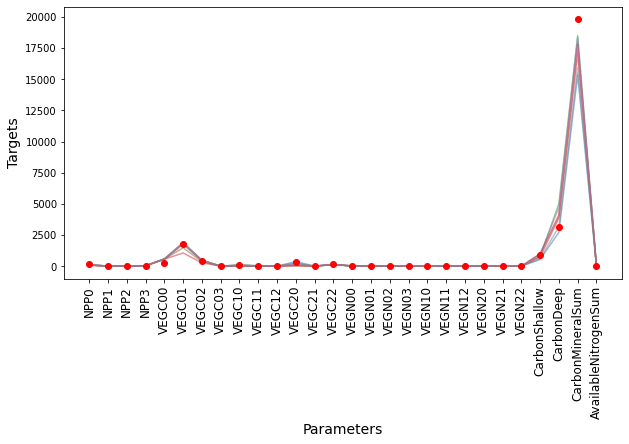

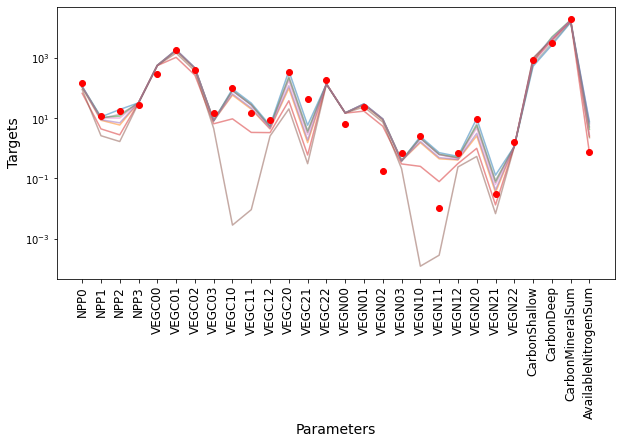

In [3]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

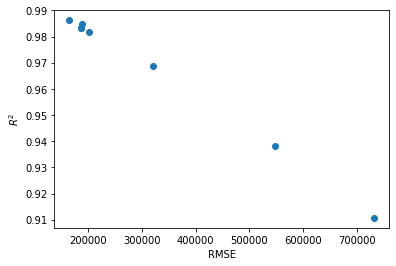

In [24]:
ut.plot_r2_rmse(df_model)

In [5]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams(xparams)

micbnup   kdcrawc   kdcsoma  kdcsompr      kdcsomcr     $R^2$  \
1  0.470557  0.615966  0.134458  0.002169  1.100000e-07  0.983227   
2  0.137975  0.977740  0.599765  0.001580  5.700000e-07  0.984641   
4  0.156250  0.357105  0.759406  0.001367  1.943000e-05  0.986268   
5  0.307053  0.185249  0.242840  0.001276  2.075000e-05  0.983336   
6  0.167420  1.046672  0.154970  0.001767  1.866000e-05  0.981774   

            RMSE         MAPE  
1  187290.597972     1.649039  
2  189061.215291     0.862344  
4  165103.745065     1.401232  
5  186433.176105  2085.996662  
6  201711.531414     0.982543

In [13]:
xparams[xparams.MAPE<1]

micbnup   kdcrawc   kdcsoma  kdcsompr      kdcsomcr     $R^2$  \
2  0.137975  0.977740  0.599765  0.001580  5.700000e-07  0.984641   
6  0.167420  1.046672  0.154970  0.001767  1.866000e-05  0.981774   

            RMSE      MAPE  
2  189061.215291  0.862344  
6  201711.531414  0.982543

#### interpratation of the MAPE:
A lower MAPE value indicates that the forecasted values are closer to the actual values, which means that the forecasting model is more accurate. Therefore, a MAPE value of 0.862344 indicates that, on average, the forecasted values deviate from the actual values by only 0.862344%, which is relatively low.

The first MAPE value of 1.649039 is also relatively low, which means that the forecasting model has a reasonably good accuracy. However, the third MAPE value of 2085.996662 is extremely high, indicating that the forecasting model has a poor accuracy and is likely not suitable for making accurate forecasts.

In [32]:
ymodel

NPP0       NPP1       NPP2       NPP3      VEGC00       VEGC01  \
1  105.891313   8.556808   5.947431  33.135608  572.862610  1745.708643   
2  112.499596  10.468261  11.807583  32.930460  575.284650  1864.594714   
4  110.953564   8.923807   7.031984  33.124210  574.641949  1833.407910   
5   90.267547   2.622047   1.682179  31.960560  569.781366  1471.740088   
6  113.672324  10.214824  10.156964  33.148953  575.220764  1879.282019   

       VEGC02    VEGC03     VEGC10     VEGC11  ...    VEGN10    VEGN11  \
1  439.431720  8.300069  58.760101  19.900596  ...  1.544589  0.447552   
2  468.110272  8.790728  82.970644  27.966311  ...  2.179161  0.628185   
4  460.645123  8.245332  64.599901  21.876574  ...  1.697757  0.492334   
5  372.410641  4.550016   0.002793   0.009113  ...  0.000120  0.000279   
6  471.739331  8.583170  80.716319  27.232883  ...  2.119834  0.612163   

     VEGN12    VEGN20    VEGN21    VEGN22  CarbonShallow   CarbonDeep  \
1  0.408977  2.585688  0.033783  1.171657     925.543909  4108.943528   
2  0.488111  5.656188  0.074377  1.164833     757.082296  5029.558121   
4  0.422327  3.153100  0.041345  1.171254     964.230926  4694.860658   
5  0.239600  0.536230  0.006715  1.132263    1013.557128  4059.166376   
6  0.453741  4.761094  0.062991  1.172121     750.816478  4132.466365   

   CarbonMineralSum  AvailableNitrogenSum  
1      17766.084788              2.459732  
2      18507.169807              4.251182  
4      18348.489099              6.575334  
5      17791.180819              2.255372  
6      17678.694642              2.718329  

[5 rows x 28 columns]

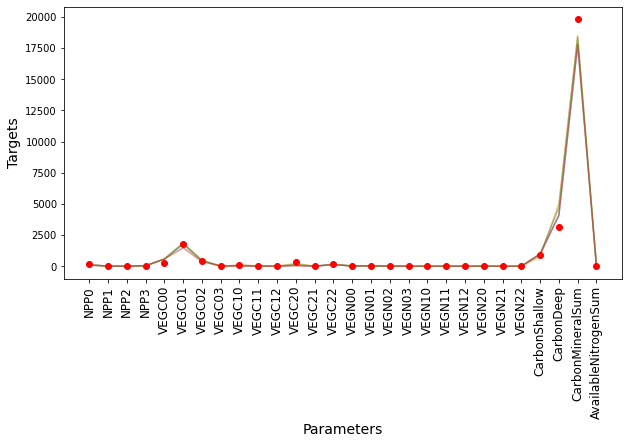

In [29]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.97)

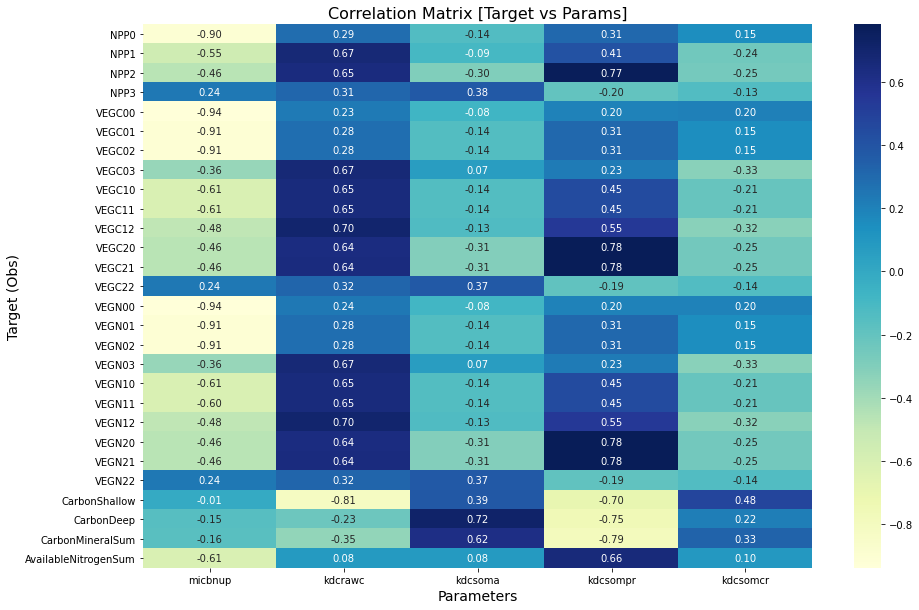

In [33]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

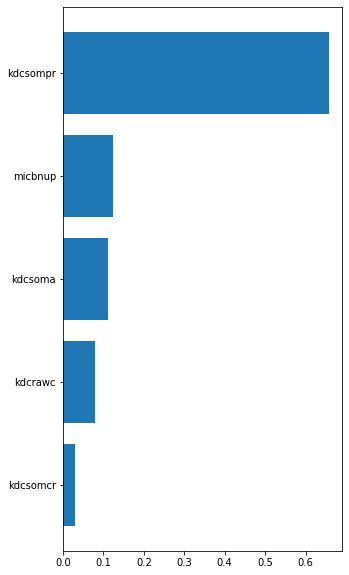

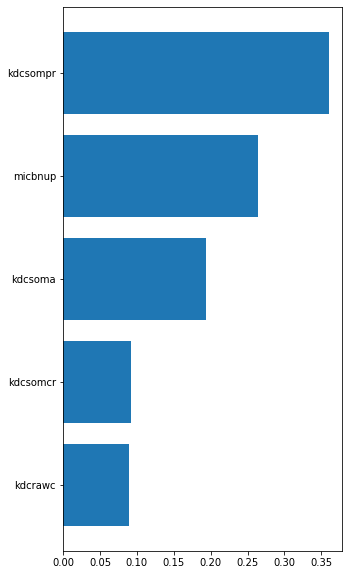

In [15]:
e_r2=ut.find_important_features_err(df_param,df_model,error='r2')
e_rmse=ut.find_important_features_err(df_param,df_model,error='mae')

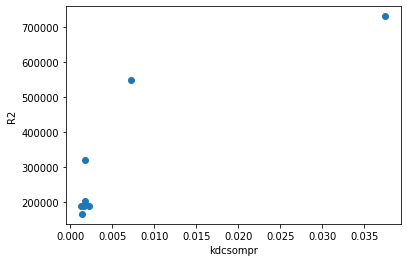

In [37]:
plt.scatter(df_param['kdcsompr'], pd.Series(e_rmse))
plt.xlabel('kdcsompr'); plt.ylabel('R2');
#plt.ylim(0,0.5*1e7)

## SA STEP2

In [12]:
path='MD1/STEP2_calib_runs/' #10% variance
params='param_step2-md1.csv'
model='out_step2-md1.csv'
df_model = pd.read_csv(path+model)
output_name = ['NPP0','NPP1','NPP2','NPP3','VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model.columns = output_name

df_param = pd.read_csv(path+params)
output_name = ['nmax0','nmax1','nmax2','nmax3','krb00','krb01','krb02','krb03','krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = output_name


In [14]:
df_param.head()

nmax0  nmax1  nmax2  nmax3  krb00  krb01  krb02  krb03  krb10  krb11  \
0   3.27   1.33   1.15   2.23 -17.49 -16.61 -17.65  -0.20  -4.94  -7.35   
1   1.91   1.00   1.09   2.12 -18.13 -11.36 -16.28 -15.99  -4.90  -4.65   
2   4.98   3.00   5.00   4.73  -4.66  -0.96 -17.38  -4.33  -5.10 -19.93   
3   3.53   3.48   4.00   4.70 -15.81  -7.25  -0.16  -4.37  -5.00  -2.78   
4   1.43   4.33   1.33   3.19 -15.91 -19.59 -17.16 -17.28  -5.31  -1.54   

   krb12  krb20  krb21  krb22  
0 -17.64  -9.00 -18.32  -0.38  
1 -15.43  -8.84 -14.47 -17.97  
2  -4.95  -6.25 -17.76 -11.33  
3 -17.56 -19.57 -19.36  -4.68  
4  -5.04  -0.56 -19.89  -9.95

In [15]:
df_model.head()

NPP0       NPP1       NPP2       NPP3      VEGC00       VEGC01  \
0  139.379927  21.394598  19.248304   6.848077  566.287439  1750.086560   
1  144.807432  10.815520  20.850578  48.898651  566.394403  1807.171558   
2  116.244996  15.290179  19.799217  25.460311  559.557440  1440.754065   
3  144.710234   8.111597  35.653917  25.891334  566.044946  1818.436475   
4  127.565740   7.764023  17.280087  47.282592  567.916974  1997.050378   

       VEGC02    VEGC03      VEGC10     VEGC11    VEGC12      VEGC20  \
0  214.249664  8.823316  336.500629  35.417191  4.809064  308.542447   
1  223.775446  8.024488   98.735821  15.405673  4.252773  335.248608   
2  168.227446  6.976845  216.247081  21.992844  4.994828  282.176047   
3  221.160716  8.403320   26.124343  11.426887  4.058275  578.186230   
4   53.075486  8.108595   17.678415  17.170451  4.655120  242.013118   

      VEGC21      VEGC22  
0   2.419928   39.945841  
1   7.583990  292.432257  
2   8.478235  152.183142  
3  13.003645  154.772502  
4   7.289599  283.022885

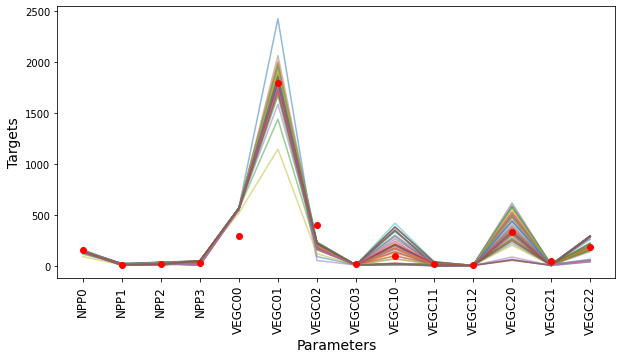

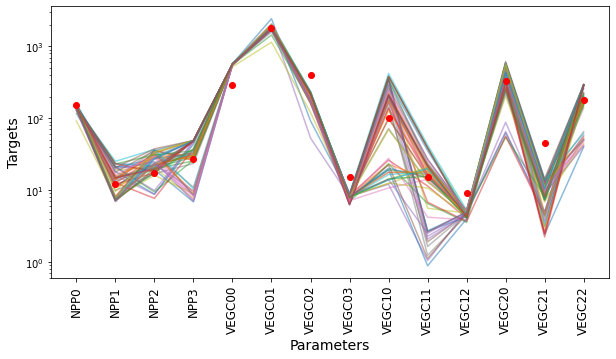

In [16]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

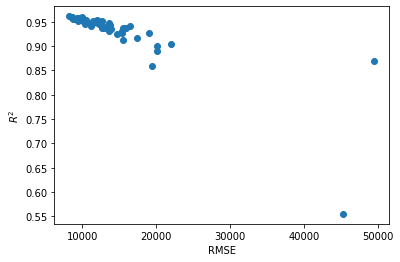

In [18]:
ut.plot_r2_rmse(df_model)

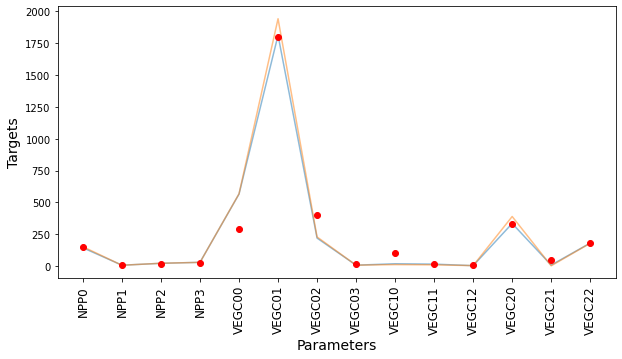

In [24]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.959)

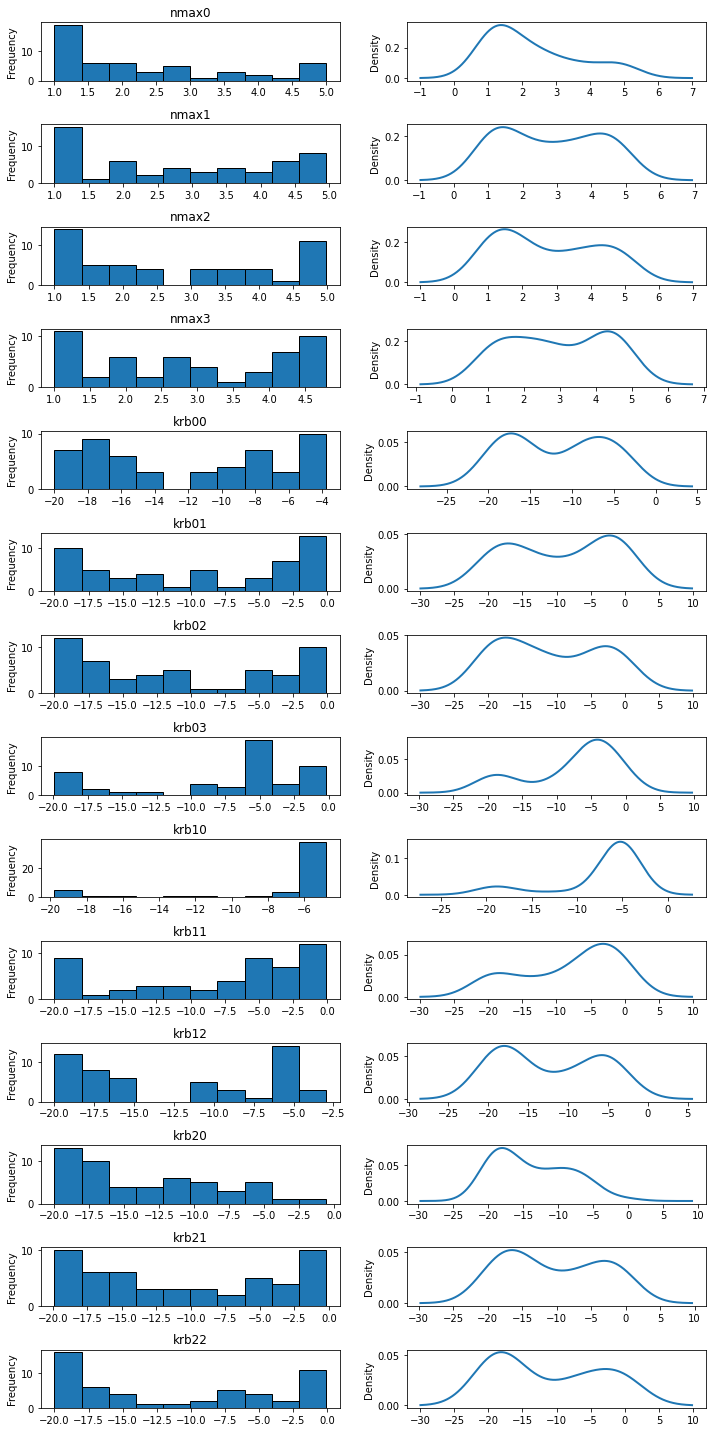

In [22]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
ut.plot_hist_dist(xparams)

In [26]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.959)
xparams.head()

nmax0  nmax1  nmax2  nmax3  krb00  krb01  krb02  krb03  krb10  krb11  \
22   1.45   4.43   4.83   2.55 -18.31  -8.24  -2.11  -4.74  -4.99  -1.95   
28   4.74   1.91   1.21   1.06  -6.64 -19.95  -5.94  -4.72  -5.14  -0.10   
47   1.90   1.11   1.46   1.93 -15.47 -20.00 -10.44  -5.08  -4.95  -5.46   

    krb12  krb20  krb21  krb22  
22  -5.52 -19.74 -19.09  -4.88  
28 -19.93 -16.83  -4.33  -0.16  
47 -19.65 -19.05  -0.32  -1.55

In [45]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.963)
xparams

nmax0     nmax1     nmax2     nmax3     krb00     krb01     krb02  \
132  3.645565  1.590961  0.957222  3.776196 -6.433644 -3.689095 -3.197167   
255  3.257758  1.557636  1.068066  3.899445 -6.467423 -3.361312 -2.770148   
280  3.686055  1.515028  1.056704  3.385489 -6.588399 -3.122781 -3.011082   
346  3.166546  1.512556  1.089602  3.296887 -6.316219 -3.179991 -3.233942   
350  3.049437  1.540890  0.924688  3.415146 -6.511271 -3.216569 -3.224841   
405  3.621153  1.479758  1.028133  3.419752 -6.549565 -3.128062 -2.997078   
416  3.163073  1.502971  1.027504  3.246805 -5.833848 -3.474012 -3.242772   
897  3.641775  1.572474  1.055765  3.373256 -6.213819 -3.727514 -2.882582   
960  3.301270  1.622477  1.082625  3.732853 -5.672552 -3.717932 -2.883673   

        krb03     krb10     krb11     krb12     krb20     krb21     krb22  
132 -4.419584 -5.128921 -5.109356 -7.104858 -8.574725 -6.542795 -3.299944  
255 -4.640135 -5.115842 -5.142346 -6.627631 -8.754698 -6.028141 -3.430269  
280 -4.798341 -5.063532 -4.758999 -7.233245 -7.677141 -6.352214 -3.022513  
346 -4.539903 -5.148629 -4.987869 -6.819800 -7.694906 -5.761066 -3.480361  
350 -4.376389 -5.115769 -5.198078 -7.161357 -8.288549 -6.242853 -3.005093  
405 -4.339848 -5.087127 -4.816167 -6.298060 -8.190768 -6.714395 -3.015497  
416 -4.626316 -5.188471 -5.080029 -7.044200 -8.356480 -6.679378 -3.143003  
897 -4.909567 -5.099394 -4.696312 -6.758406 -7.593511 -6.779476 -3.399301  
960 -4.720893 -5.203481 -4.829047 -7.028398 -8.357707 -6.687744 -2.990061

In [50]:
xparams.mean()

nmax0    3.392515
nmax1    1.543861
nmax2    1.032256
nmax3    3.505092
krb00   -6.287416
krb01   -3.401919
krb02   -3.049254
krb03   -4.596775
krb10   -5.127907
krb11   -4.957578
krb12   -6.897328
krb20   -8.165387
krb21   -6.420896
krb22   -3.198449
dtype: float64

In [51]:
xparams.std()

nmax0    0.253106
nmax1    0.046109
nmax2    0.056457
nmax3    0.233989
krb00    0.326580
krb01    0.257807
krb02    0.180812
krb03    0.195524
krb10    0.045720
krb11    0.185452
krb12    0.300321
krb20    0.416974
krb21    0.352429
krb22    0.203767
dtype: float64

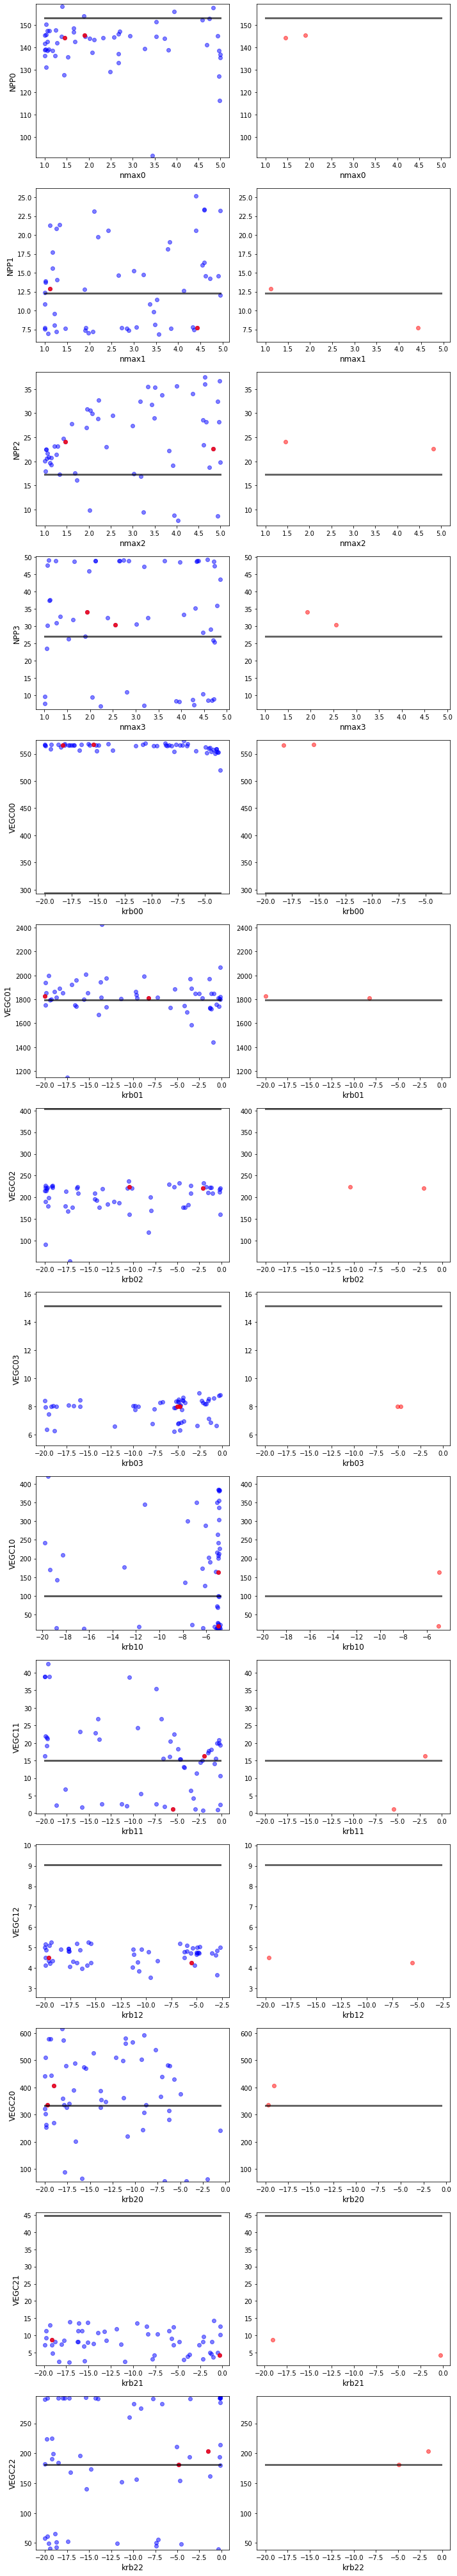

In [27]:
ut.plot_param_target(df_param,df_model,r2lim=0.96)

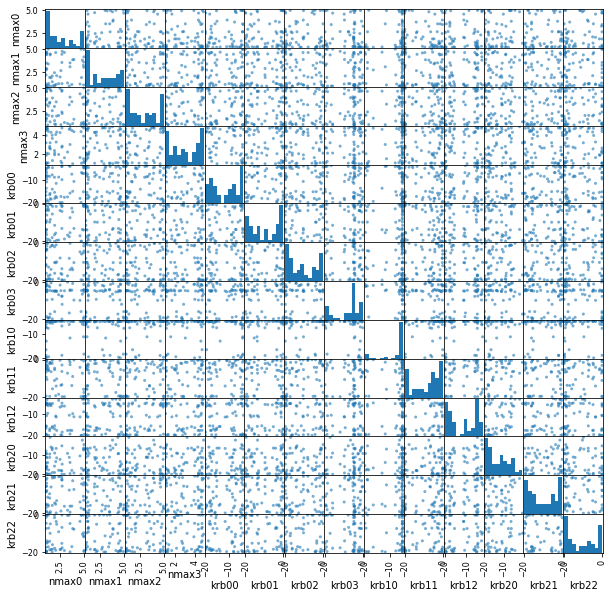

In [29]:
#from pandas.plotting import scatter_matrix
scatter_matrix(df_param, alpha=0.6,figsize=(10,10));

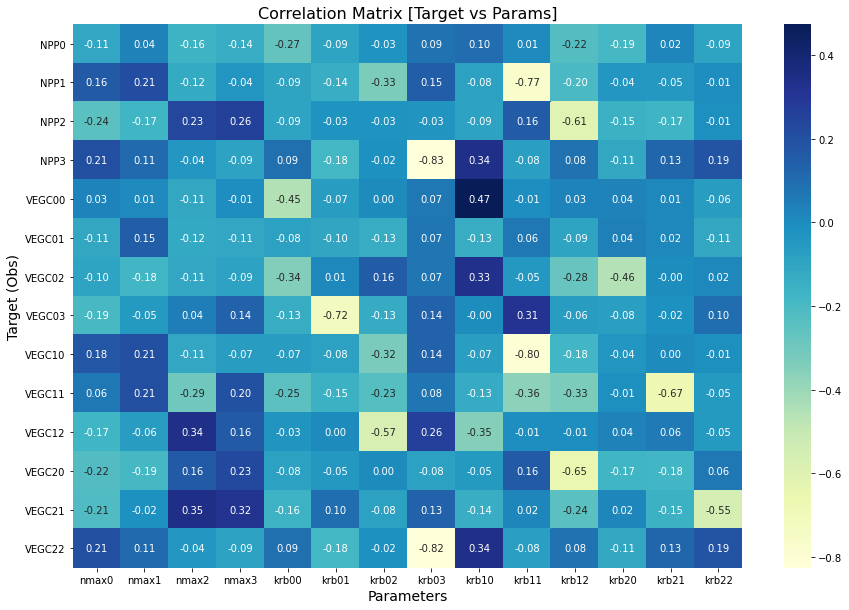

In [30]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

## SA STEP2 bnd

In [32]:
path='data/SA-MD1-STEP2/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3','VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model.columns = output_name

df_param = pd.read_csv(path+params)
output_name = ['nmax0','nmax1','nmax2','nmax3','krb00','krb01','krb02','krb03','krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = output_name

In [63]:
cat SA-MD1-STEP2/param_props.csv

name,bounds,initial,cmtnum,pftnum
nmax,"[1, 5]",3.383716,1,0
nmax,"[1, 5]",1.54588,1,1
nmax,"[1, 5]",1.000042,1,2
nmax,"[1, 5]",3.551762,1,3
krb(0),"[-20, -0.1]",-6.0,1,0
krb(0),"[-20, -0.1]",-3.45,1,1
krb(0),"[-20, -0.1]",-2.95,1,2
krb(0),"[-20, -0.1]",-4.65,1,3
krb(1),"[-20, -0.1]",-4.88,1,0
krb(1),"[-20, -0.1]",-5.15,1,1
krb(1),"[-20, -0.1]",-6.65,1,2
krb(2),"[-20, -0.1]",-8.2,1,0
krb(2),"[-20, -0.1]",-6.2,1,1
krb(2),"[-20, -0.1]",-3.2,1,2


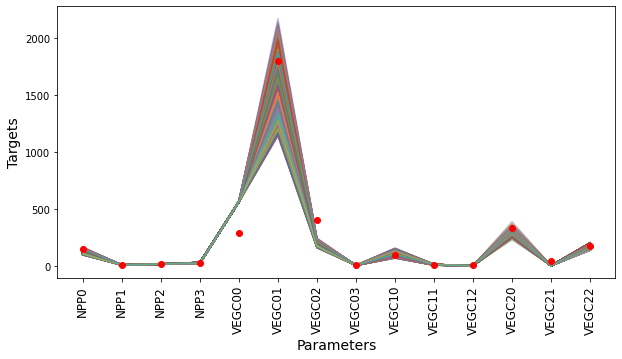

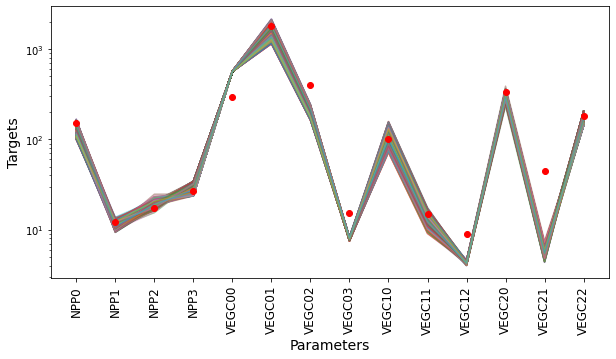

In [33]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

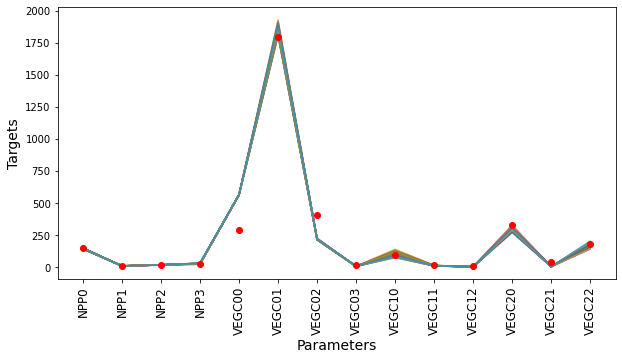

In [34]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.962)

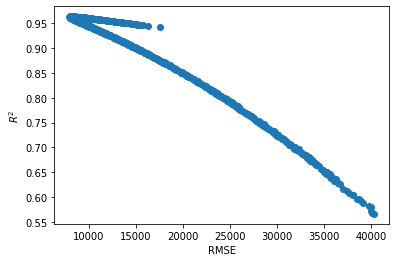

In [10]:
ut.plot_r2_rmse(df_model)

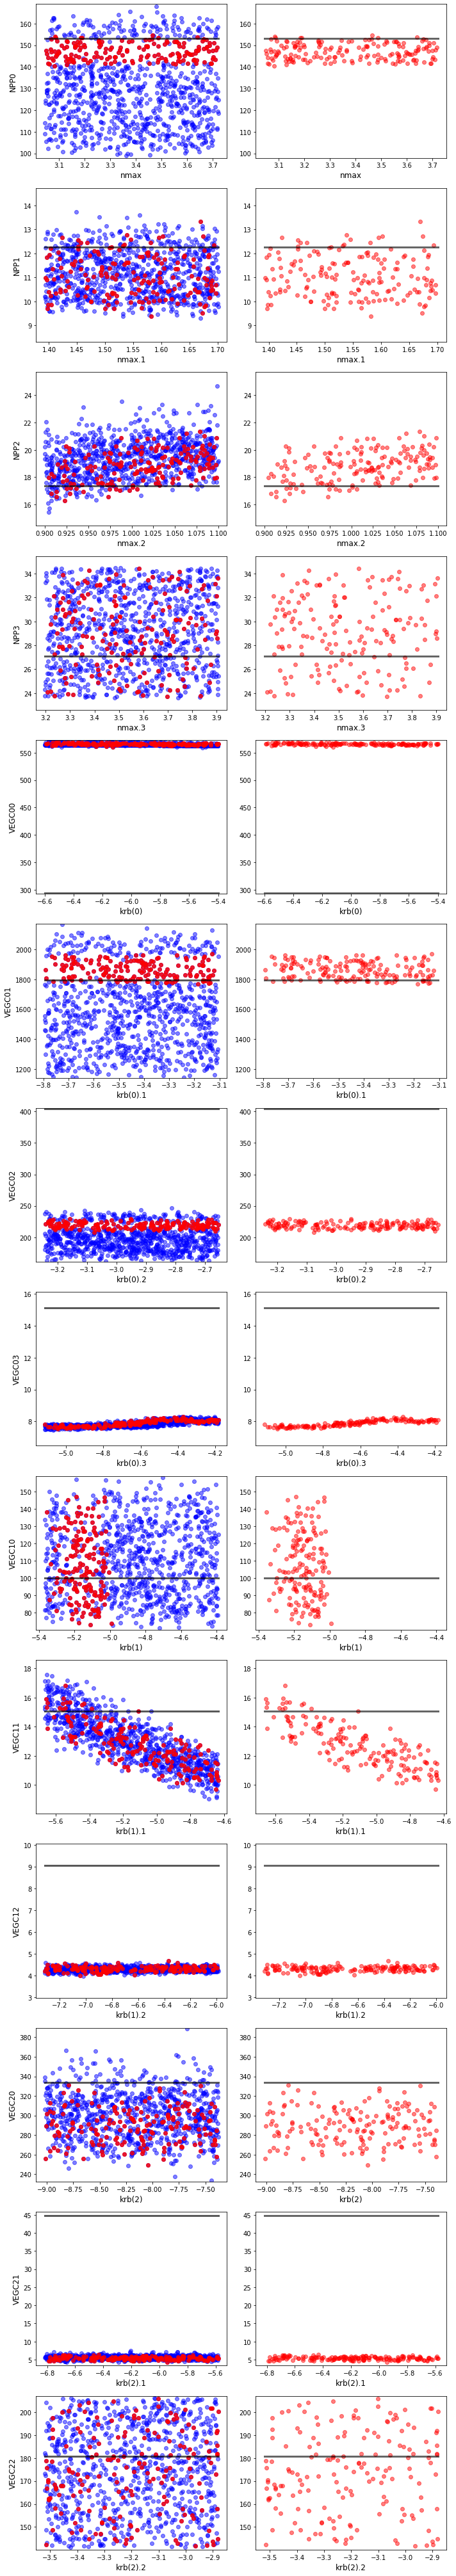

In [22]:
output_name = ['NPP0','NPP1','NPP2','NPP3','VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model.columns = output_name
ut.plot_param_target(df_param,df_model,r2lim=0.96)

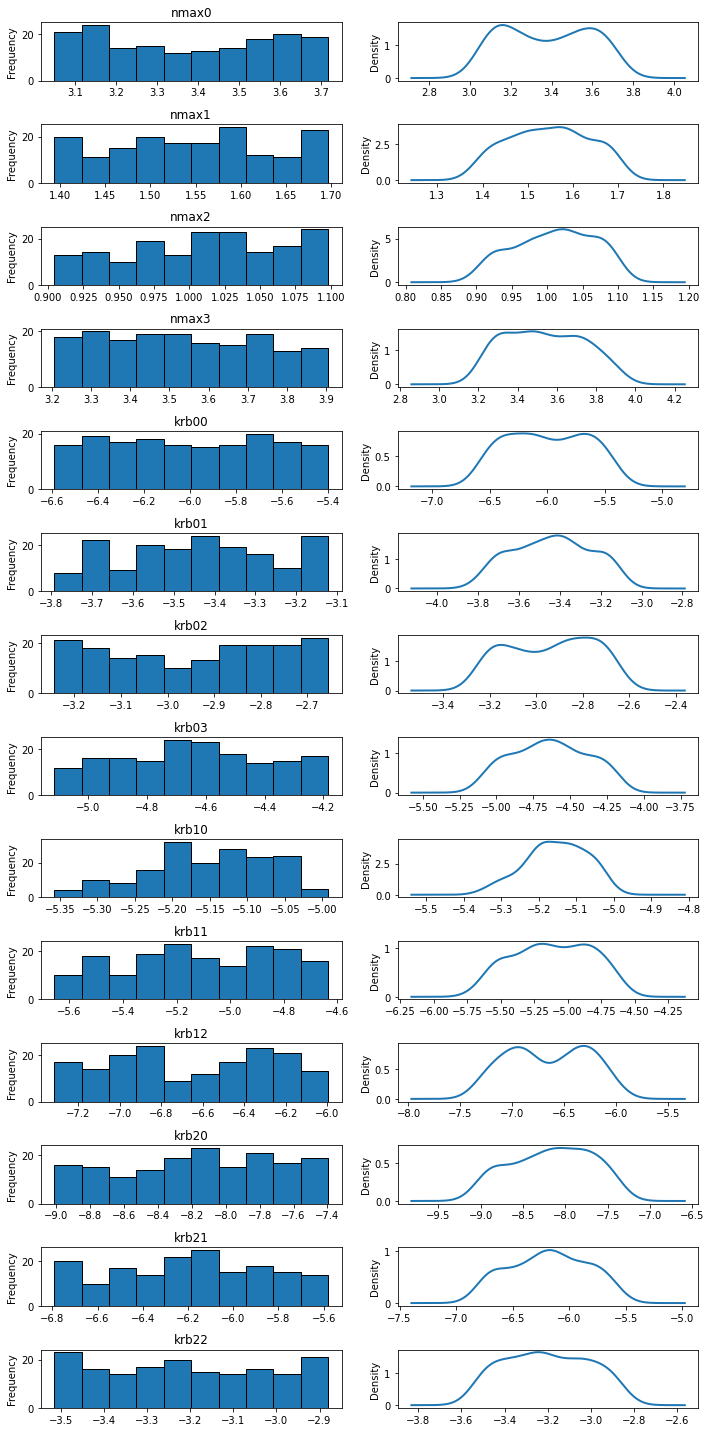

In [35]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.96)
ut.plot_hist_dist(xparams)

## SA STEP2 VEGC(cfall+-0.75)

In [2]:
path='data/SA-STEP2-MD1-VEGC-cfall-075/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3','VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model.columns = output_name

df_param = pd.read_csv(path+params)
output_name = ['cfall00','cfall01','cfall02','cfall03','cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = output_name

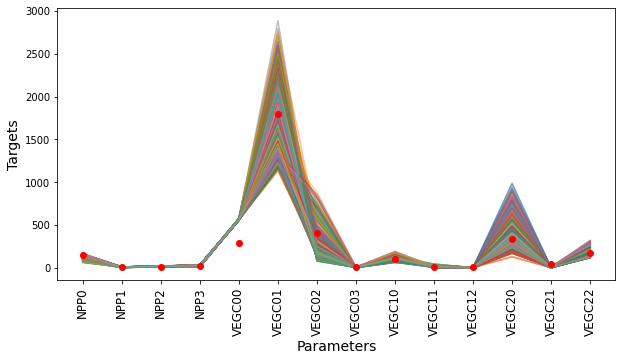

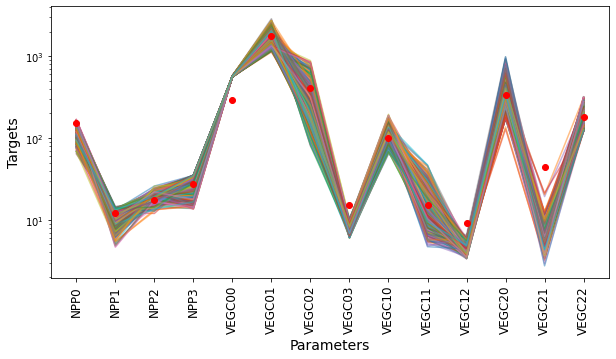

In [3]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

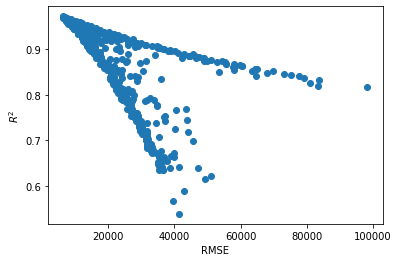

In [4]:
ut.plot_r2_rmse(df_model)

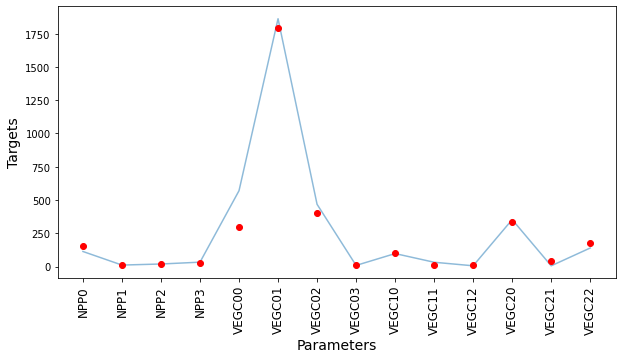

In [11]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.97)

In [12]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

cfall00   cfall01   cfall02   cfall03   cfall10   cfall11   cfall12  \
256  0.001107  0.050722  0.024987  0.019928  0.003407  0.004790  0.003590   
397  0.002047  0.067849  0.052519  0.016679  0.003217  0.005117  0.002847   

      cfall20   cfall21   cfall22     $R^2$         RMSE      MAPE  
256  0.005149  0.001171  0.026025  0.971681  6457.652754  0.734040  
397  0.005036  0.003907  0.008196  0.970201  7114.677349  0.509366

In [9]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.969)
xparams

cfall00   cfall01   cfall02   cfall03   cfall10   cfall11   cfall12  \
256  0.001107  0.050722  0.024987  0.019928  0.003407  0.004790  0.003590   
397  0.002047  0.067849  0.052519  0.016679  0.003217  0.005117  0.002847   
430  0.002410  0.112996  0.066896  0.013677  0.003747  0.001282  0.002478   

      cfall20   cfall21   cfall22     $R^2$         RMSE      MAPE  
256  0.005149  0.001171  0.026025  0.971681  6457.652754  0.734040  
397  0.005036  0.003907  0.008196  0.970201  7114.677349  0.509366  
430  0.006290  0.004697  0.011211  0.969132  6388.345722  0.738578

In [9]:
xparams.mean()

cfall00       0.002017
cfall01       0.078388
cfall02       0.048752
cfall03       0.017281
cfall10       0.003413
cfall11       0.003279
cfall12       0.003607
cfall20       0.006570
cfall21       0.002901
cfall22       0.020046
$R^2$         0.969319
RMSE       6759.798478
dtype: float64

In [10]:
xparams.std()

cfall00      0.000707
cfall01      0.038144
cfall02      0.018727
cfall03      0.002112
cfall10      0.000181
cfall11      0.001703
cfall12      0.000983
cfall20      0.001263
cfall21      0.001350
cfall22      0.008307
$R^2$        0.001380
RMSE       433.010090
dtype: float64

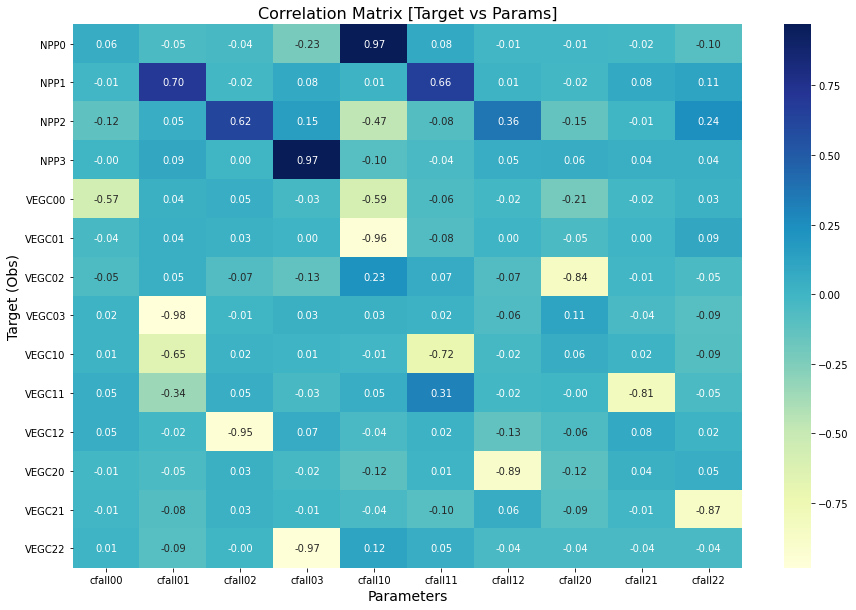

In [11]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

## SA STEP2 VEGC(cfall+-0.5)

In [63]:
path='data/SA-STEP2-MD1-VEGC-cfall-05/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model.columns = output_name

df_param = pd.read_csv(path+params)
output_name = ['cfall00','cfall01','cfall02','cfall03','cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = output_name

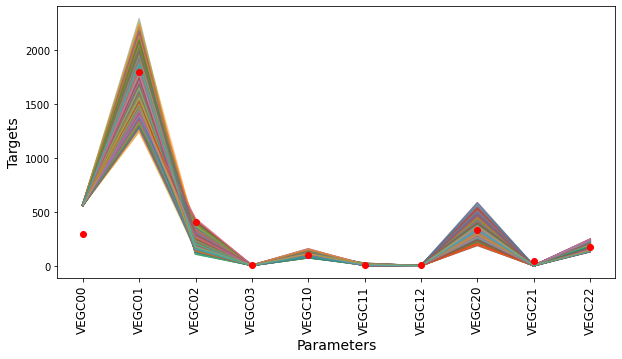

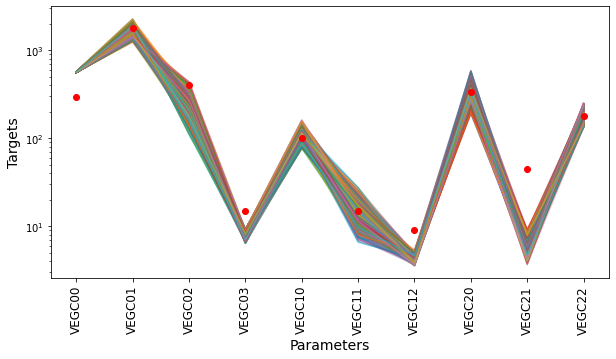

In [64]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

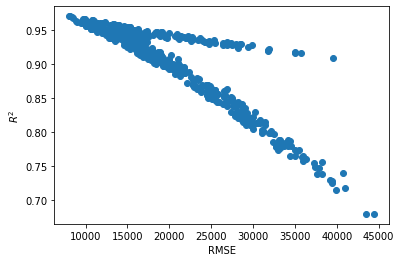

In [65]:
ut.plot_r2_rmse(df_model)

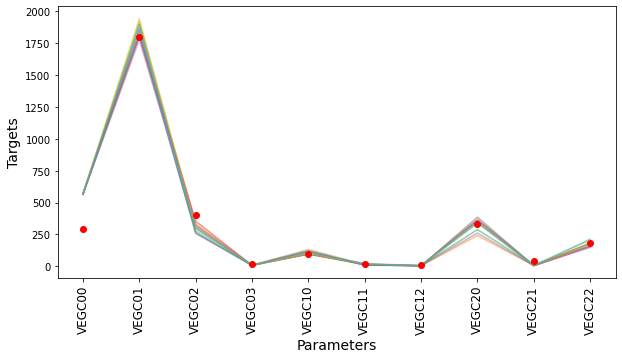

In [76]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.964)

In [78]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.964)
xparams

cfall00   cfall01   cfall02   cfall03   cfall10   cfall11   cfall12  \
38   0.001430  0.094385  0.068714  0.016299  0.003708  0.001896  0.003440   
47   0.001473  0.040358  0.110118  0.010633  0.003430  0.003091  0.005271   
153  0.002522  0.074583  0.090649  0.013130  0.003191  0.003957  0.004173   
208  0.001796  0.073184  0.081770  0.017646  0.003489  0.003838  0.003693   
223  0.002451  0.081548  0.041889  0.017339  0.003167  0.001676  0.005110   
250  0.002617  0.083289  0.093524  0.013724  0.003353  0.002121  0.003083   
256  0.001338  0.055481  0.041325  0.017952  0.003772  0.004293  0.003727   
397  0.001965  0.066899  0.059679  0.015786  0.003644  0.004511  0.003231   
429  0.002067  0.054121  0.045099  0.014196  0.003155  0.004857  0.003411   
436  0.001912  0.054956  0.061359  0.009788  0.003523  0.003126  0.003478   
451  0.001615  0.052227  0.087880  0.008399  0.003885  0.004264  0.003915   

      cfall20   cfall21   cfall22  
38   0.009416  0.002904  0.025238  
47   0.007506  0.003295  0.026313  
153  0.007851  0.002063  0.017667  
208  0.006784  0.002129  0.033634  
223  0.007522  0.003292  0.031150  
250  0.009193  0.002491  0.025879  
256  0.007766  0.001747  0.025017  
397  0.007691  0.003571  0.013131  
429  0.007958  0.002941  0.017726  
436  0.008879  0.002343  0.016090  
451  0.006603  0.003688  0.032050

## SA STEP2 VEGC(cfall+-0.1)

In [53]:
path='data/SA-STEP2-MD1-VEGC-cfall/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model.columns = output_name

df_param = pd.read_csv(path+params)
output_name = ['cfall00','cfall01','cfall02','cfall03','cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = output_name

In [54]:
df_param.head()

cfall00   cfall01   cfall02   cfall03   cfall10   cfall11   cfall12  \
0  0.001757  0.060663  0.069291  0.014688  0.004612  0.003394  0.003844   
1  0.001783  0.070124  0.070387  0.013637  0.004706  0.003487  0.003931   
2  0.001711  0.062088  0.072520  0.012872  0.004721  0.003001  0.004042   
3  0.001824  0.060535  0.068829  0.012768  0.004604  0.003314  0.003815   
4  0.001730  0.070308  0.080093  0.012814  0.004075  0.003076  0.004271   

    cfall20   cfall21   cfall22  
0  0.012021  0.002891  0.022973  
1  0.011783  0.002865  0.022849  
2  0.013019  0.002808  0.021101  
3  0.013387  0.002739  0.024827  
4  0.013218  0.003141  0.025010

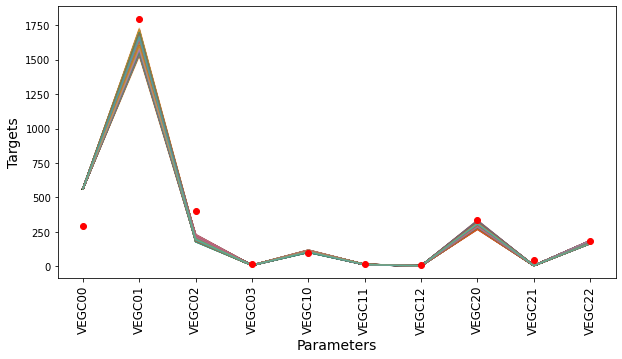

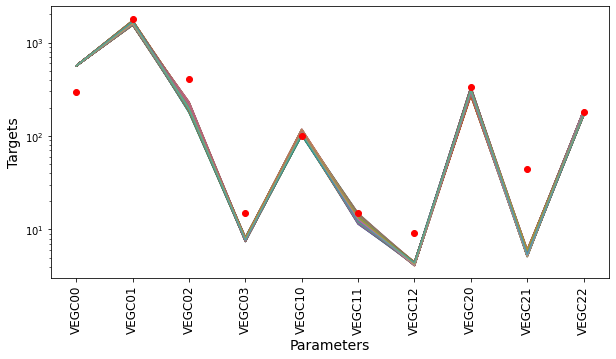

In [55]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

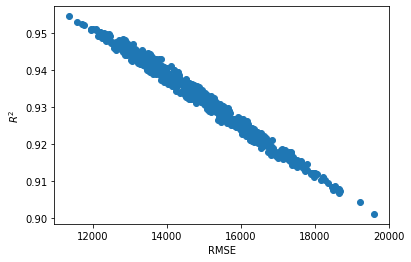

In [56]:
ut.plot_r2_rmse(df_model)

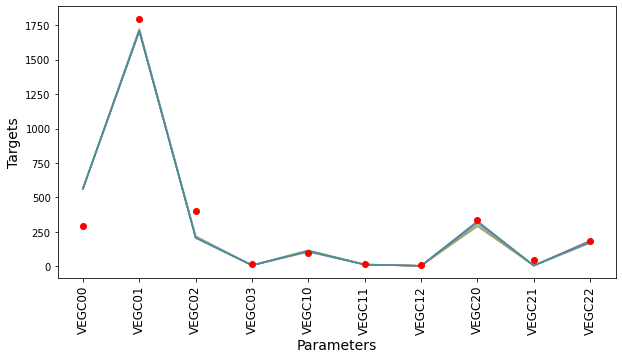

In [61]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.95)

In [62]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.95)
xparams.head()

cfall00   cfall01   cfall02   cfall03   cfall10   cfall11   cfall12  \
33   0.001924  0.070279  0.076484  0.012714  0.004096  0.003063  0.004143   
73   0.001857  0.064130  0.072005  0.013064  0.004132  0.002990  0.003648   
83   0.001834  0.059640  0.081196  0.013773  0.004069  0.003016  0.003806   
117  0.001814  0.067060  0.076565  0.012728  0.004135  0.003376  0.003697   
131  0.001793  0.070102  0.081070  0.012693  0.004062  0.003302  0.003749   

      cfall20   cfall21   cfall22  
33   0.011841  0.002858  0.022035  
73   0.012075  0.002844  0.024351  
83   0.012429  0.002647  0.021381  
117  0.012142  0.002780  0.023808  
131  0.011747  0.002925  0.024117

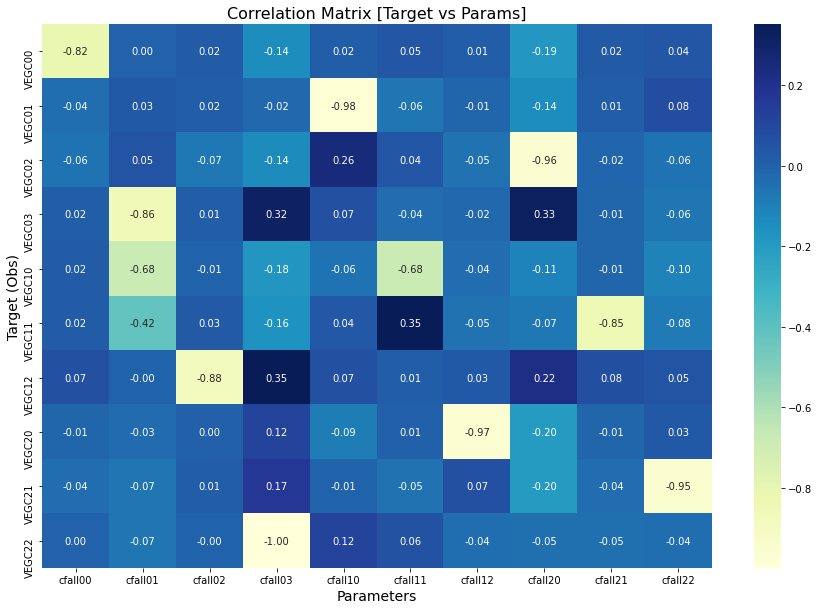

In [57]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
from pandas.plotting import scatter_matrix
%matplotlib inline

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


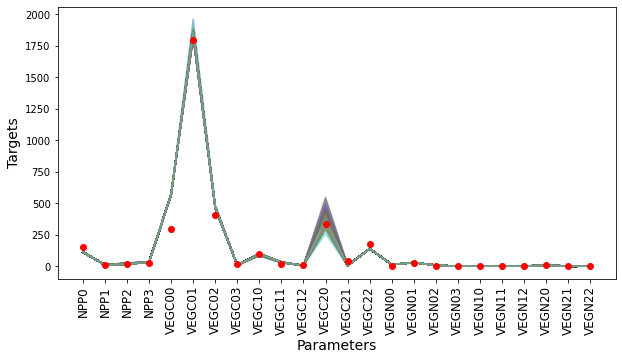

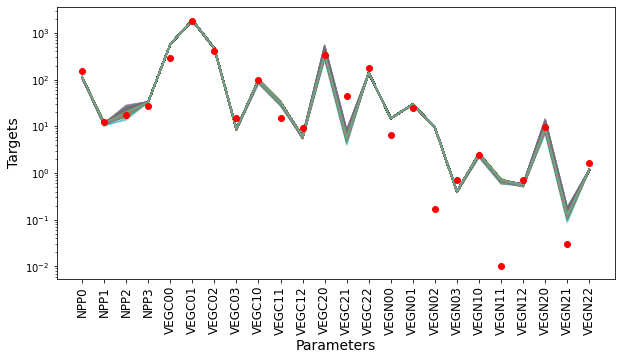

In [5]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

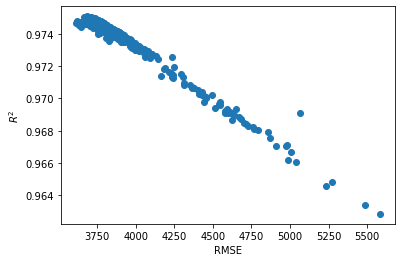

In [6]:
ut.plot_r2_rmse(df_model)

In [7]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.95)
xparams.head()

nfall00   nfall01   nfall02   nfall03   nfall10   nfall11   nfall12  \
0  0.009007  0.013990  0.014637  0.012316  0.001187  0.001215  0.004241   
1  0.010242  0.044555  0.017748  0.007250  0.001343  0.001424  0.005220   
2  0.006928  0.018592  0.023800  0.003562  0.001368  0.000320  0.006475   
3  0.012092  0.013575  0.013327  0.003062  0.001173  0.001032  0.003916   
4  0.007789  0.045148  0.045290  0.003283  0.000291  0.000491  0.009049   

    nfall20   nfall21   nfall22     $R^2$         RMSE  \
0  0.004785  0.007811  0.007928  0.974124  3793.638601   
1  0.003280  0.007283  0.007607  0.974635  3697.746740   
2  0.011121  0.006102  0.003047  0.974978  3688.704093   
3  0.013458  0.004666  0.012766  0.974848  3733.561432   
4  0.012385  0.012992  0.013243  0.974672  3690.071793   

                                                 MRE  
0  <bound method NDFrame._add_numeric_operations....  
1  <bound method NDFrame._add_numeric_operations....  
2  <bound method NDFrame._add_numeric_operations....  
3  <bound method NDFrame._add_numeric_operations....  
4  <bound method NDFrame._add_numeric_operations....

## SA STEP3  MD1 NPPVEGCVEGN nfall (+-0.75)

In [2]:
path='data/SA-STEP3-MD1-NPPVEGCVEGN-nfall-075/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
              'VEGC20','VEGC21','VEGC22', \
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
              'VEGN20','VEGN21','VEGN22']
df_model.columns = output_name

df_param = pd.read_csv(path+params)
output_name = ['nfall00','nfall01','nfall02','nfall03','nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = output_name

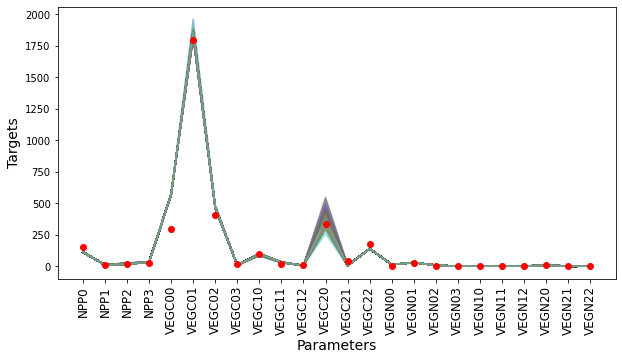

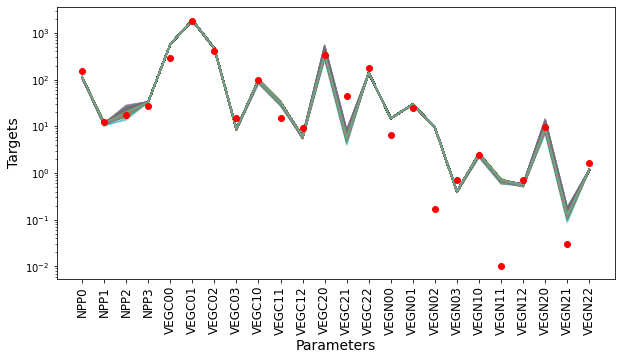

In [3]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

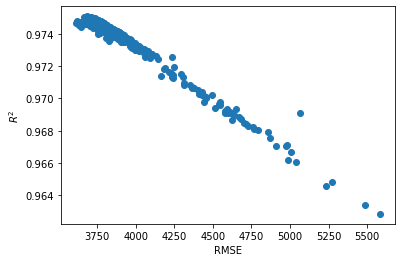

In [6]:
ut.plot_r2_rmse(df_model)

In [7]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams.head()

nfall00   nfall01   nfall02   nfall03   nfall10   nfall11   nfall12  \
0  0.009007  0.013990  0.014637  0.012316  0.001187  0.001215  0.004241   
1  0.010242  0.044555  0.017748  0.007250  0.001343  0.001424  0.005220   
2  0.006928  0.018592  0.023800  0.003562  0.001368  0.000320  0.006475   
3  0.012092  0.013575  0.013327  0.003062  0.001173  0.001032  0.003916   
4  0.007789  0.045148  0.045290  0.003283  0.000291  0.000491  0.009049   

    nfall20   nfall21   nfall22     $R^2$         RMSE      MAPE  
0  0.004785  0.007811  0.007928  0.974124  3793.638601  0.633223  
1  0.003280  0.007283  0.007607  0.974635  3697.746740  0.652296  
2  0.011121  0.006102  0.003047  0.974978  3688.704093  0.660489  
3  0.013458  0.004666  0.012766  0.974848  3733.561432  0.638390  
4  0.012385  0.012992  0.013243  0.974672  3690.071793  0.700120

## SA STEP4 SoilC (+-.75)

In [8]:
cat data/STEP4-MD1-NPPVEGCVEGN-soil/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.112375, 0.786625]",0.4495,1,None
kdcrawc,"[0.15849999999999997, 1.1095000000000002]",0.634,1,None
kdcsoma,"[0.135, 0.9450000000000001]",0.54,1,None
kdcsompr,"[0.0005, 0.0035]",0.002,1,None
kdcsomcr,"[1.75e-05, 0.0001225]",7e-05,1,None


In [9]:
path='data/STEP4-MD1-NPPVEGCVEGN-soil/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
              'VEGC20','VEGC21','VEGC22', \
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
              'VEGN20','VEGN21','VEGN22', 'CarbonShallow', 'CarbonDeep', \
              'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

df_param = pd.read_csv(path+params)
#output_name = ['nfall00','nfall01','nfall02','nfall03','nfall10']
#df_param.columns = output_name

In [10]:
df_param.head()

micbnup   kdcrawc   kdcsoma  kdcsompr  kdcsomcr
0  0.364909  1.062629  0.727915  0.002296  0.000034
1  0.217554  0.213738  0.836603  0.002303  0.000092
2  0.126254  1.080884  0.809279  0.001137  0.000037
3  0.236035  0.447834  0.560053  0.001796  0.000048
4  0.524917  0.291159  0.371637  0.001599  0.000065

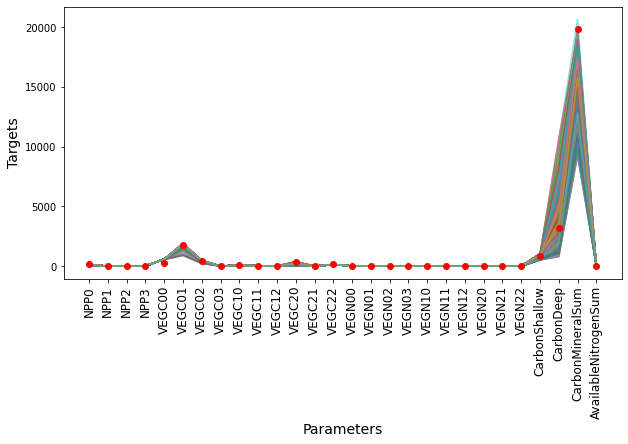

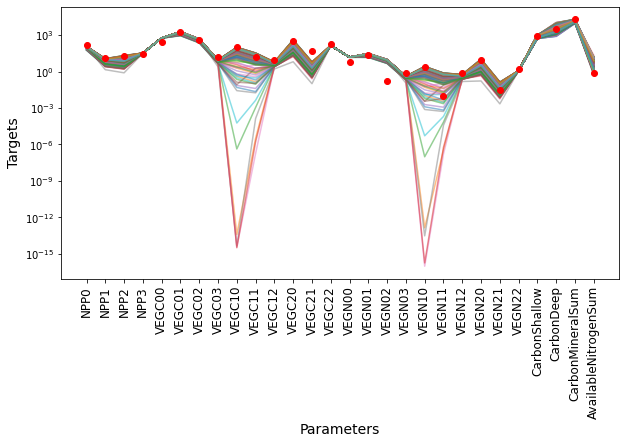

In [11]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

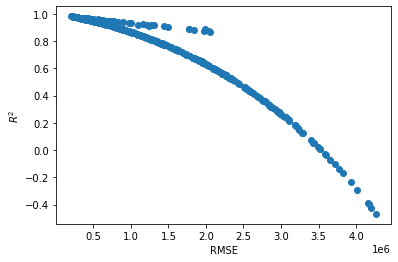

In [12]:
ut.plot_r2_rmse(df_model)

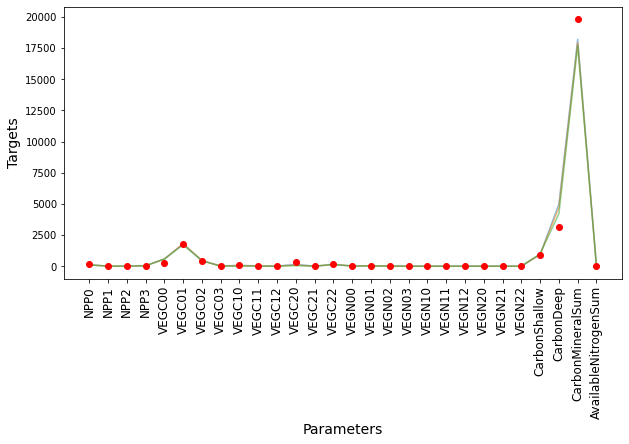

In [13]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.98)

In [14]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.977)
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr  kdcsomcr     $R^2$  \
2    0.126254  1.080884  0.809279  0.001137  0.000037  0.977996   
21   0.280460  0.548774  0.746996  0.001186  0.000026  0.982026   
73   0.372705  1.072592  0.868334  0.001087  0.000025  0.979996   
119  0.431944  0.793347  0.274579  0.001077  0.000022  0.979063   
128  0.125908  0.464797  0.306273  0.001482  0.000030  0.977373   
132  0.352473  1.096676  0.625678  0.001212  0.000028  0.978229   
138  0.330616  0.563090  0.546164  0.001227  0.000030  0.981337   
194  0.559855  1.049425  0.728383  0.001145  0.000021  0.979463   
223  0.503498  0.245504  0.845743  0.001297  0.000031  0.981279   
273  0.201085  0.839250  0.871316  0.001039  0.000042  0.977533   
393  0.508678  0.333937  0.428411  0.001504  0.000020  0.979869   
407  0.348030  0.267005  0.257510  0.001176  0.000044  0.977890   
412  0.154363  0.645890  0.788187  0.001878  0.000023  0.978754   
444  0.586835  0.672704  0.213193  0.001226  0.000019  0.980547   

              RMSE      MAPE  
2    258095.561892  0.914221  
21   214175.513042  1.169201  
73   239355.180024  1.239375  
119  253470.262101  1.374855  
128  242842.703602  1.053230  
132  247710.518670  1.475059  
138  214676.025382  1.782207  
194  240064.408371  1.590756  
223  207713.256051  4.484676  
273  259951.258018  1.005173  
393  222656.494035  1.971306  
407  241385.673426  2.930149  
412  227177.164123  0.971355  
444  227050.611664  1.692325

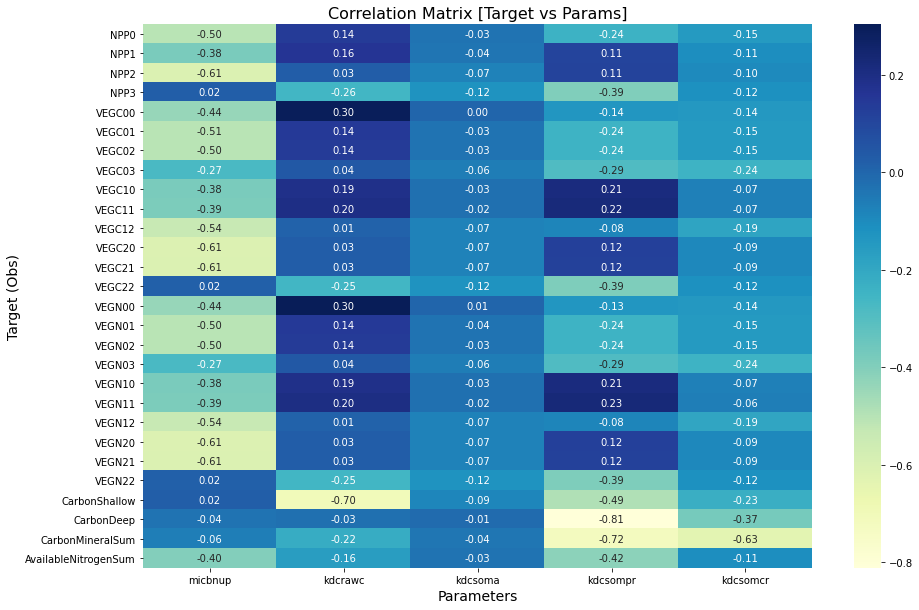

In [15]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

## SA STEP4 SoilC (+-.99)

In [2]:
cat data/STEP4-MD1-NPPVEGCVEGN-soil/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.112375, 0.786625]",0.4495,1,None
kdcrawc,"[0.15849999999999997, 1.1095000000000002]",0.634,1,None
kdcsoma,"[0.135, 0.9450000000000001]",0.54,1,None
kdcsompr,"[0.0005, 0.0035]",0.002,1,None
kdcsomcr,"[1.75e-05, 0.0001225]",7e-05,1,None


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
path='data/sa-step4-md1-soil-099/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
              'VEGC20','VEGC21','VEGC22', \
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
              'VEGN20','VEGN21','VEGN22', 'CarbonShallow', 'CarbonDeep', \
              'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

df_param = pd.read_csv(path+params)

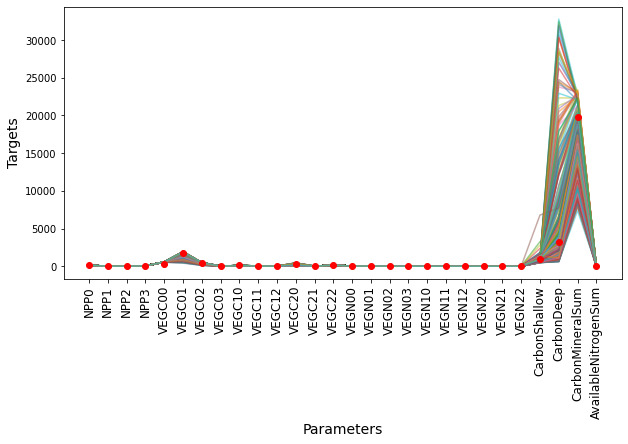

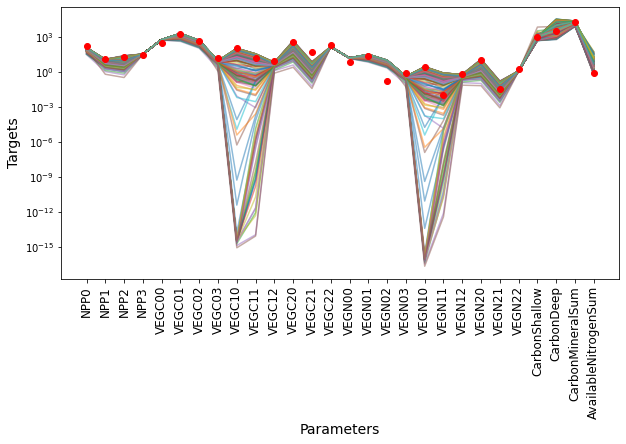

In [3]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

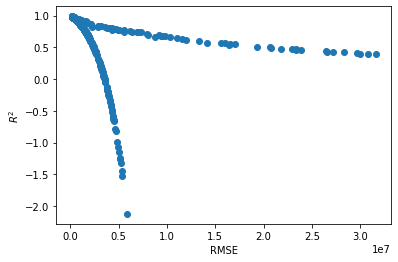

In [79]:
ut.plot_r2_rmse(df_model)

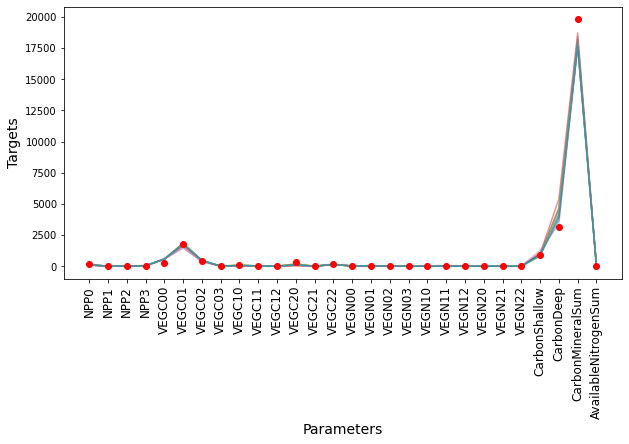

In [83]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.98)

In [84]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.98)
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr  kdcsomcr     $R^2$  \
11   0.460894  0.669126  0.258719  0.002299  0.000001  0.983273   
21   0.585843  0.243018  0.160074  0.001215  0.000012  0.985079   
61   0.062554  0.415303  0.357474  0.001840  0.000019  0.981509   
96   0.421345  0.257493  0.366915  0.001118  0.000004  0.982098   
165  0.506687  0.112891  0.261025  0.001721  0.000006  0.988423   
177  0.180869  0.808181  1.046688  0.001248  0.000035  0.981052   
253  0.266898  0.572397  0.009963  0.002479  0.000010  0.983211   
261  0.424248  0.273225  0.519133  0.001477  0.000008  0.986934   
279  0.164239  0.876828  0.389932  0.001639  0.000018  0.981001   
303  0.441003  0.719036  0.384800  0.002263  0.000002  0.984231   
309  0.293334  1.131828  0.017836  0.002852  0.000006  0.983368   
313  0.311138  0.079684  0.546567  0.001615  0.000025  0.981062   

              RMSE        MAPE  
11   186804.717316    1.605679  
21   176878.762776  271.199538  
61   201556.511569    0.958790  
96   226976.335518    2.727899  
165  134306.906201    2.738641  
177  214630.800015    1.136105  
253  182774.017418    2.336141  
261  158140.360340    2.052817  
279  212188.887104    0.946398  
303  177677.667873    1.476458  
309  181957.148799    1.360360  
313  205923.305256    4.009028

In [45]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.981)
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr  kdcsomcr     $R^2$  \
11   0.460894  0.669126  0.258719  0.001363  0.000018  0.981588   
13   0.341889  0.271829  0.244701  0.001352  0.000030  0.983193   
61   0.062554  0.415303  0.357474  0.001190  0.000027  0.984606   
146  0.106096  0.778918  0.174860  0.001446  0.000027  0.982247   
152  0.256489  0.326277  0.214870  0.001208  0.000033  0.982524   
236  0.253127  0.712582  0.305747  0.001342  0.000029  0.981393   
253  0.266898  0.572397  0.009963  0.001431  0.000023  0.982975   
279  0.164239  0.876828  0.389932  0.001113  0.000027  0.981745   
303  0.441003  0.719036  0.384800  0.001350  0.000018  0.981420   
356  0.071337  0.589172  0.354303  0.001129  0.000031  0.982768   
370  0.145196  0.515116  0.728229  0.001226  0.000032  0.983621   
382  0.083673  0.849818  0.573423  0.001409  0.000020  0.983802   
384  0.004832  0.235758  0.345056  0.001319  0.000031  0.987310   
468  0.078241  0.687659  0.280262  0.001212  0.000037  0.983925   
470  0.146981  0.150746  0.494028  0.001175  0.000021  0.984387   
477  0.302084  1.058956  0.066800  0.001244  0.000031  0.982644   

              RMSE        MAPE  
11   210329.772095    1.925997  
13   189465.451152    2.590022  
61   187819.908423    0.909924  
146  198455.529770    0.970757  
152  204285.301507    1.233295  
236  208816.865956    1.352621  
253  191044.576269    3.229225  
279  222106.655219    0.944890  
303  212531.124433    1.771212  
356  209334.489983    0.858581  
370  193478.523565    1.106390  
382  189578.033188    0.857088  
384  147037.548952    2.108596  
468  187544.673111    0.921209  
470  181314.343268  143.167977  
477  199299.341400    1.683458

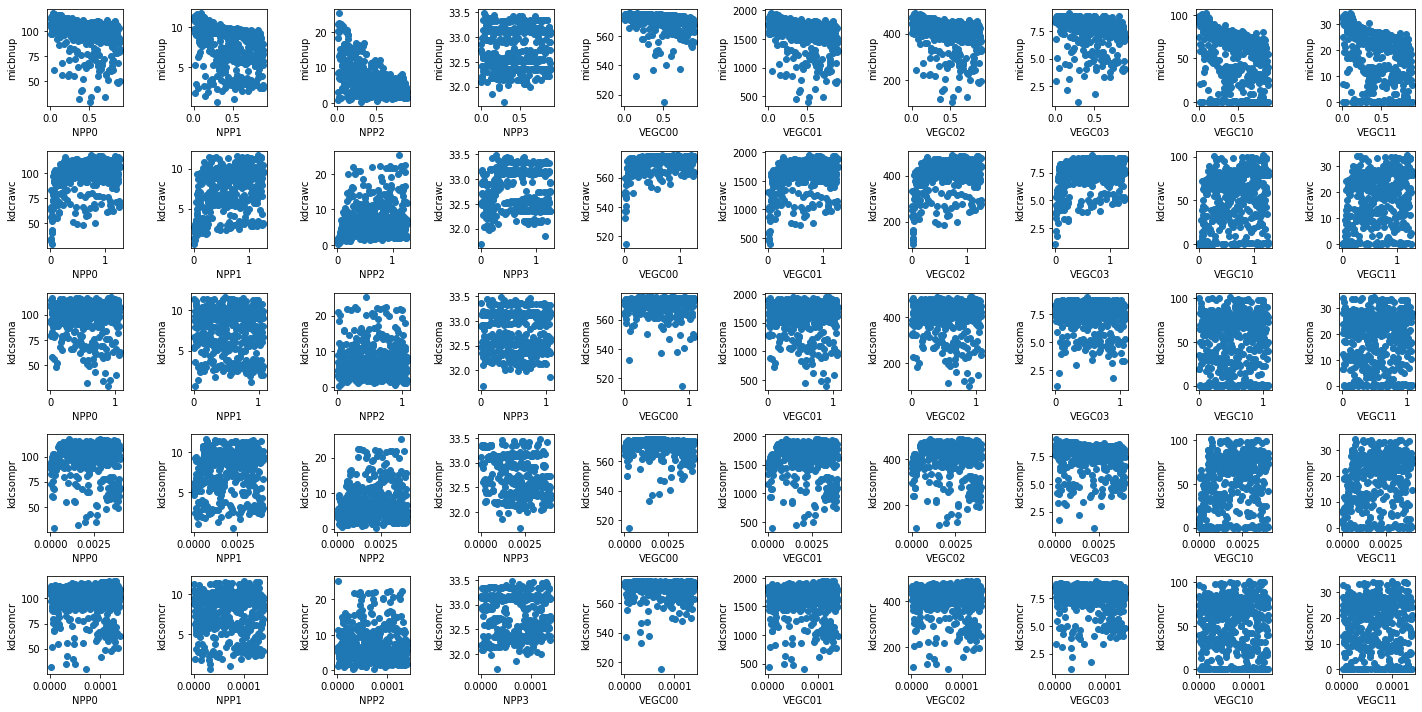

In [92]:
[n,m]=df_param.shape
fig, axs = plt.subplots(nrows=m, ncols=10, figsize=(20,10))
for i in range(m):
    for j in range(10):
        axs[i,j].scatter(df_param.iloc[0:n,i], df_model.iloc[0:n,j])
        axs[i,j].set_xlabel(df_model.columns[j])
        axs[i,j].set_ylabel(df_param.columns[i])
fig.tight_layout() 

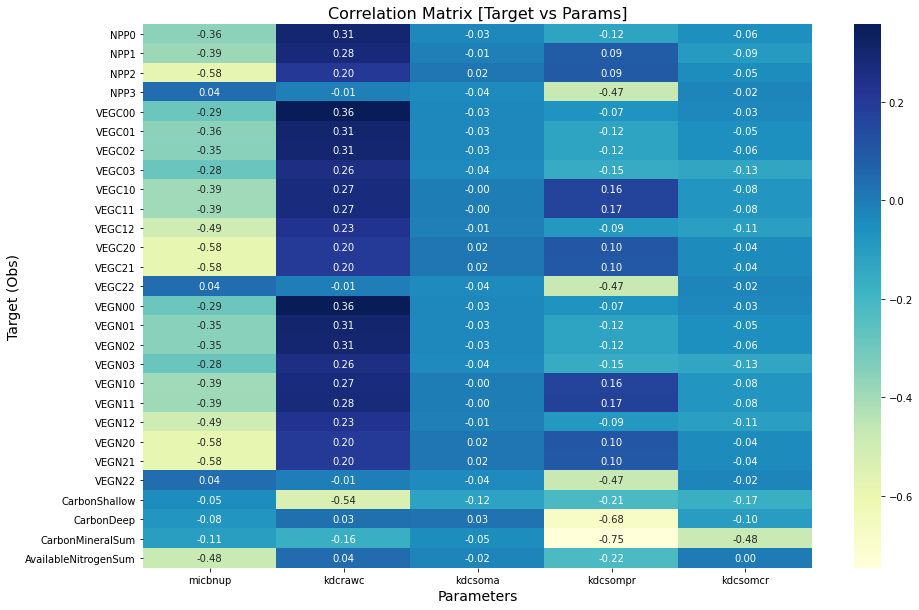

In [85]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

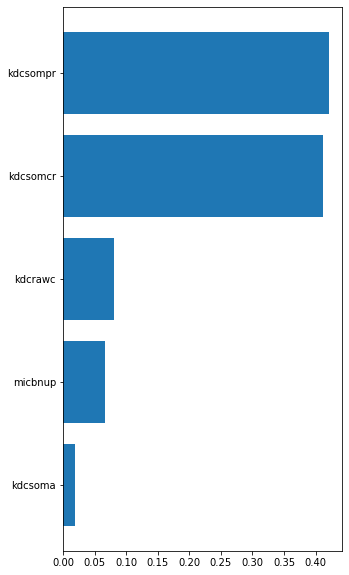

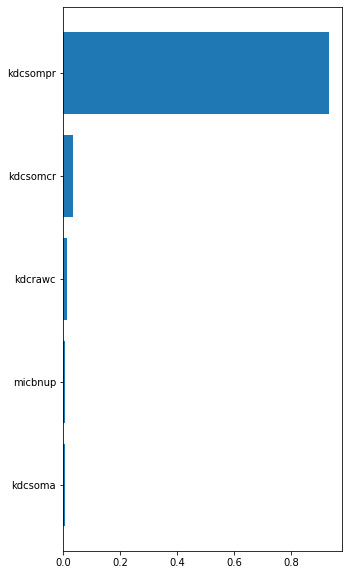

In [16]:
e_r2=ut.find_important_features_err(df_param,df_model,error='r2')
e_rmse=ut.find_important_features_err(df_param,df_model,error='rmse')

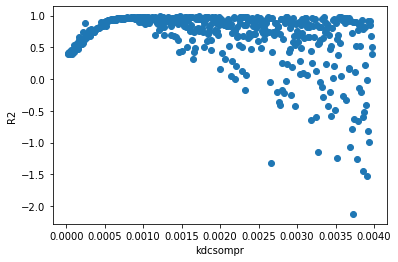

In [17]:
plt.scatter(df_param['kdcsompr'], pd.Series(e_r2))
plt.xlabel('kdcsompr'); plt.ylabel('R2');
#plt.ylim(0,0.5*1e7)

In [20]:
cat data/STEP4-MD1-NPPVEGCVEGN-soil/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.112375, 0.786625]",0.4495,1,None
kdcrawc,"[0.15849999999999997, 1.1095000000000002]",0.634,1,None
kdcsoma,"[0.135, 0.9450000000000001]",0.54,1,None
kdcsompr,"[0.0005, 0.0035]",0.002,1,None
kdcsomcr,"[1.75e-05, 0.0001225]",7e-05,1,None


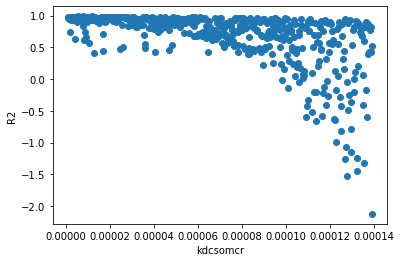

In [18]:
plt.scatter(df_param['kdcsomcr'], pd.Series(e_r2))
plt.xlabel('kdcsomcr'); plt.ylabel('R2');
#plt.ylim(0,0.5*1e7)

(1.75e-05, 9e-05)

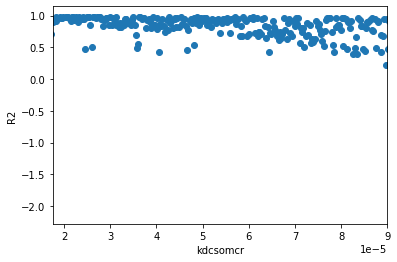

In [21]:
plt.scatter(df_param['kdcsomcr'], pd.Series(e_r2))
plt.xlabel('kdcsomcr'); plt.ylabel('R2');
plt.xlim(1.75e-05, 0.00009)

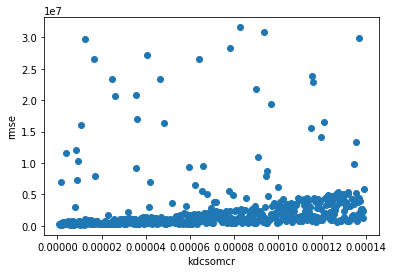

In [19]:
plt.scatter(df_param['kdcsomcr'], pd.Series(e_rmse))
plt.xlabel('kdcsomcr'); plt.ylabel('rmse');
#plt.ylim(0,0.5*1e7)

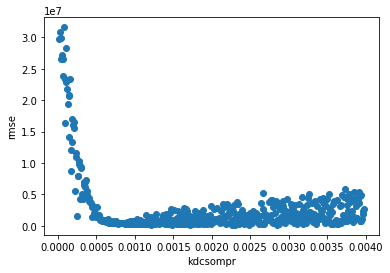

In [9]:
plt.scatter(df_param['kdcsompr'], pd.Series(e))
plt.xlabel('kdcsompr'); plt.ylabel('rmse');
#plt.ylim(0,0.5*1e7)

(0.0005, 0.002)

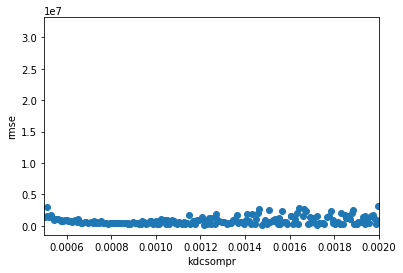

In [13]:
plt.scatter(df_param['kdcsompr'], pd.Series(e))
plt.xlabel('kdcsompr'); plt.ylabel('rmse');
plt.xlim(0.0005,0.002)

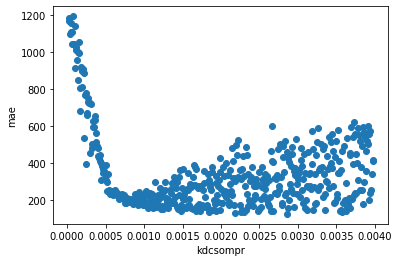

In [5]:
plt.scatter(df_param['kdcsompr'], pd.Series(e))
plt.xlabel('kdcsompr'); plt.ylabel('mae');
#plt.ylim(0,0.5*1e7)

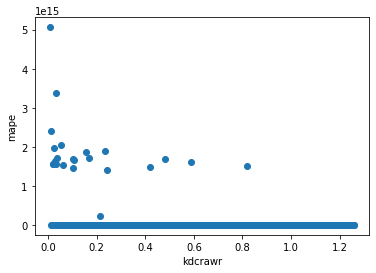

In [7]:
plt.scatter(df_param['kdcrawc'], pd.Series(e))
plt.xlabel('kdcrawr'); plt.ylabel('mape');
#plt.ylim(0,0.5*1e7)

## SA STEP4 SoilC (bound) kdcsomcr-kdcsompr-fixed

In [38]:
cat data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.004495000000000027, 0.894505]",0.4495,1,None
kdcrawc,"[0.006340000000000012, 1.26166]",0.634,1,None
kdcsoma,"[0.00539999999999996, 1.0746000000000002]",0.54,1,None
kdcsompr,"[0.0005, 0.002]",0.002,1,None
kdcsomcr,"[1.75e-05, 9e-05]",7e-05,1,None


In [39]:
path='data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
              'VEGC20','VEGC21','VEGC22', \
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
              'VEGN20','VEGN21','VEGN22', 'CarbonShallow', 'CarbonDeep', \
              'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

df_param = pd.read_csv(path+params)

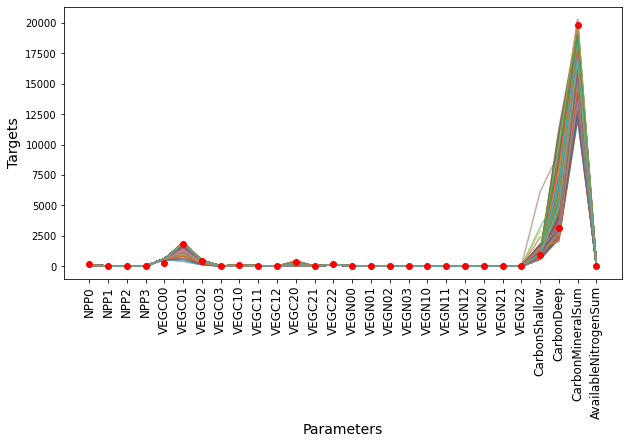

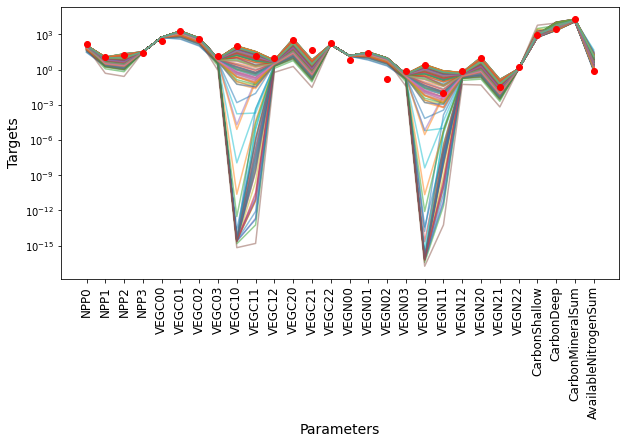

In [40]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

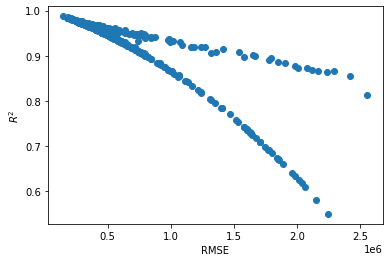

In [42]:
ut.plot_r2_rmse(df_model)

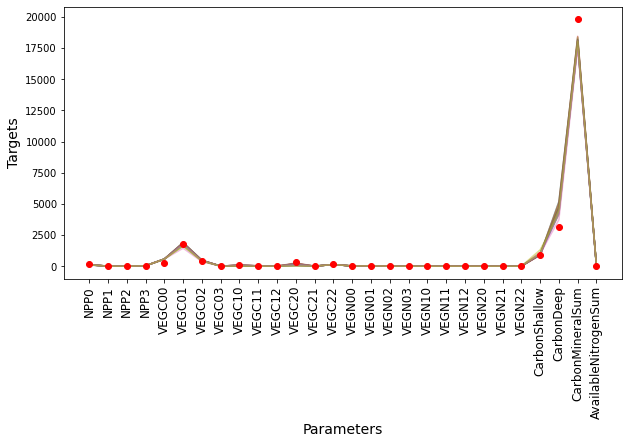

In [43]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.98)

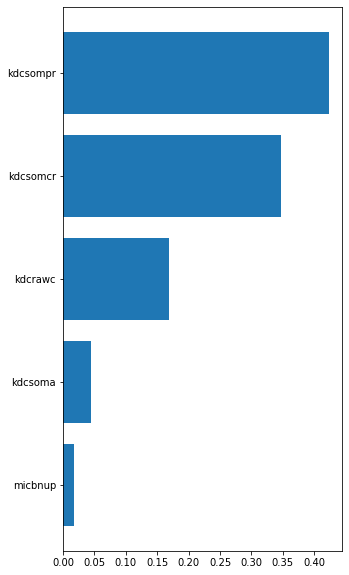

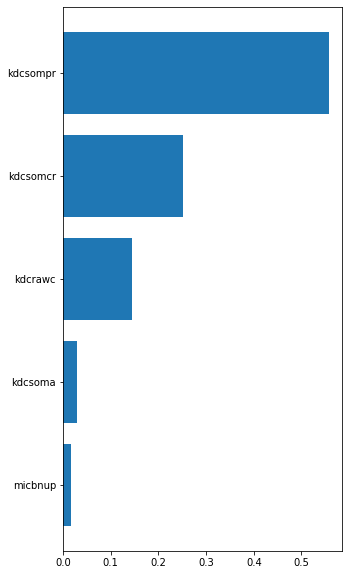

In [41]:
e_r2=ut.find_important_features_err(df_param,df_model,error='r2')
e_rmse=ut.find_important_features_err(df_param,df_model,error='rmse')

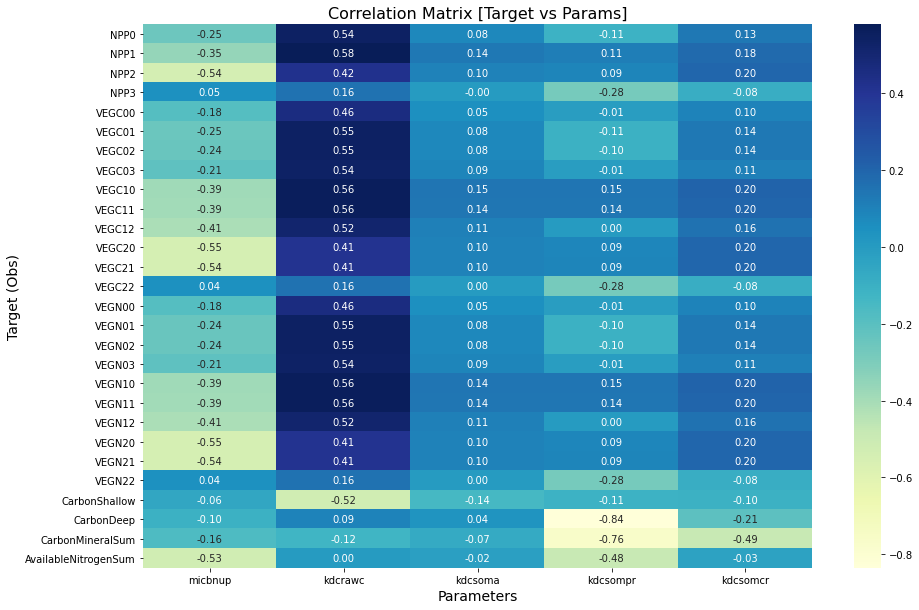

In [46]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

## SA STEP4 SoilC (bound)

In [7]:
cat data/STEP4-MD1-NPPVEGCVEGN-soil-bounds/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.1, 2.0]",0.4495,1,None
kdcrawc,"[0.6, 0.99]",0.634,1,None
kdcsoma,"[0.1, 0.6]",0.54,1,None
kdcsompr,"[0.001, 0.1]",0.002,1,None
kdcsomcr,"[1e-07, 0.001]",7e-05,1,None


In [88]:
path='data/STEP4-MD1-NPPVEGCVEGN-soil-bounds/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
              'VEGC20','VEGC21','VEGC22', \
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
              'VEGN20','VEGN21','VEGN22', 'CarbonShallow', 'CarbonDeep', \
              'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

df_param = pd.read_csv(path+params)

In [48]:
df_param.shape

(500, 5)

In [49]:
df_model.shape

(501, 28)

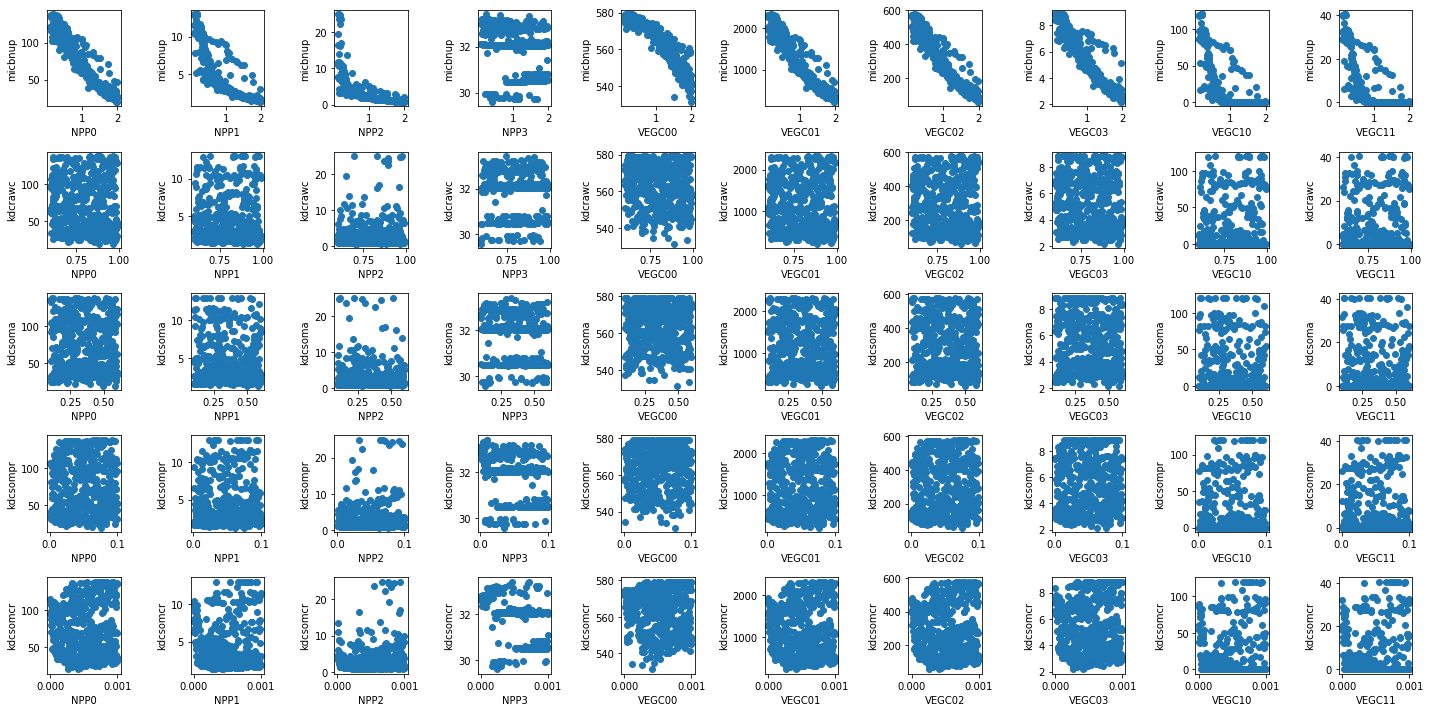

In [89]:
[n,m]=df_param.shape
fig, axs = plt.subplots(nrows=m, ncols=10, figsize=(20,10))
for i in range(m):
    for j in range(10):
        axs[i,j].scatter(df_param.iloc[0:n,i], df_model.iloc[0:n,j])
        axs[i,j].set_xlabel(df_model.columns[j])
        axs[i,j].set_ylabel(df_param.columns[i])
fig.tight_layout() 

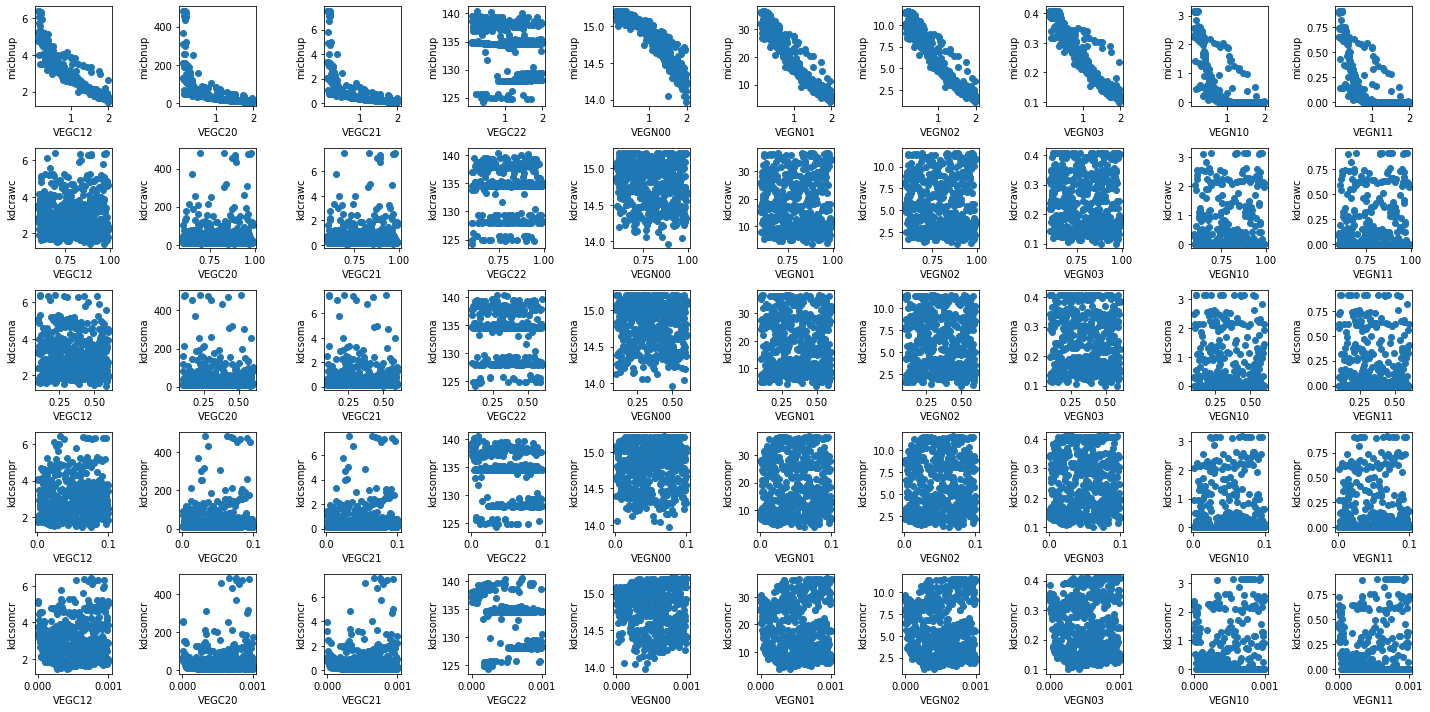

In [75]:
fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(20,10))
j=0
for i in range(5):
    for j in range(10):
        k=j+10
        axs[i,j].scatter(df_param.iloc[0:500,i], df_model.iloc[0:500,k])
        axs[i,j].set_xlabel(df_model.columns[k])
        axs[i,j].set_ylabel(df_param.columns[i])
        j=+1
fig.tight_layout() 

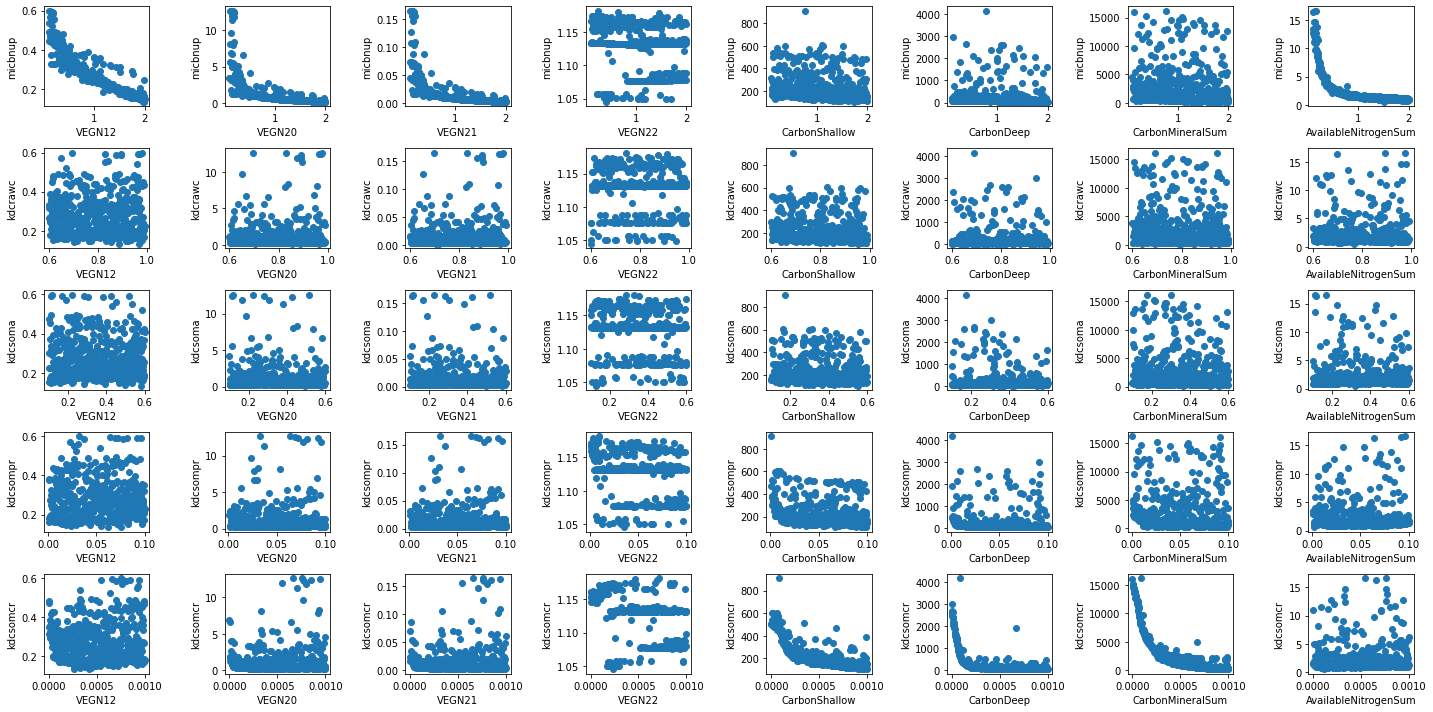

In [76]:
fig, axs = plt.subplots(nrows=5, ncols=8, figsize=(20,10))
j=0
for i in range(5):
    for j in range(8):
        k=j+20
        axs[i,j].scatter(df_param.iloc[0:500,i], df_model.iloc[0:500,k])
        axs[i,j].set_xlabel(df_model.columns[k])
        axs[i,j].set_ylabel(df_param.columns[i])
        j=+1
fig.tight_layout() 

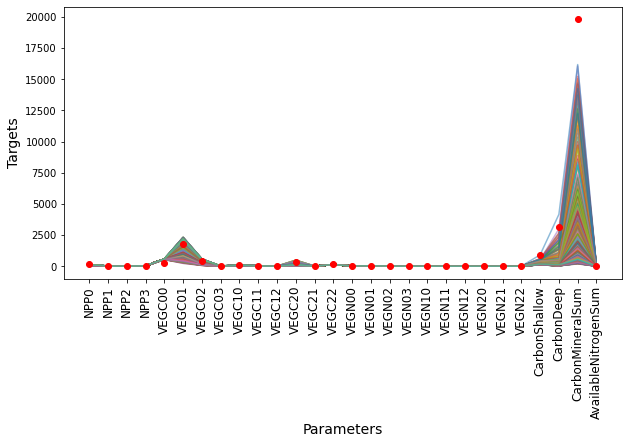

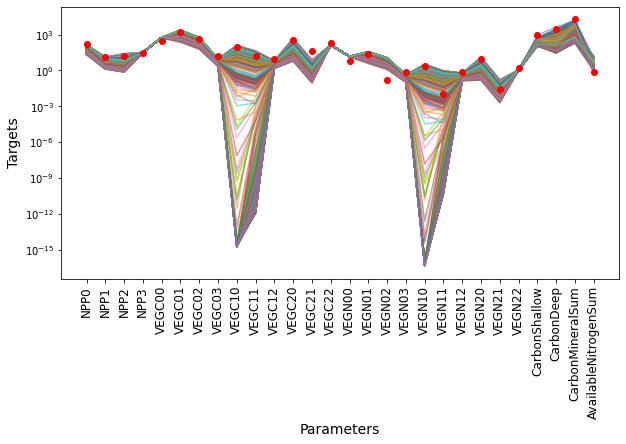

In [44]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

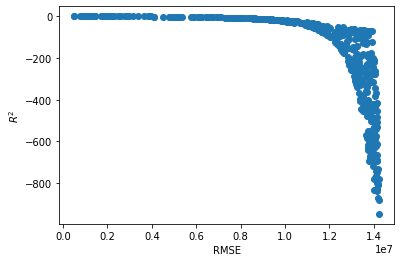

In [4]:
ut.plot_r2_rmse(df_model)

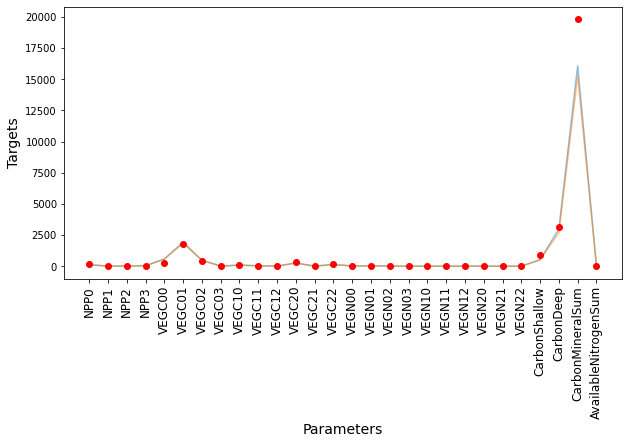

In [5]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.9)

In [6]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.9)
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr  kdcsomcr     $R^2$  \
14   0.125345  0.942582  0.302822  0.091488  0.000001  0.942753   
283  0.377467  0.757151  0.213743  0.026668  0.000006  0.904427   
350  0.771636  0.689909  0.173975  0.001006  0.000087  0.944957   

              RMSE      MAPE  
14   515470.770848  0.900292  
283  771077.996293  0.810143  
350  514962.644558  2.292416

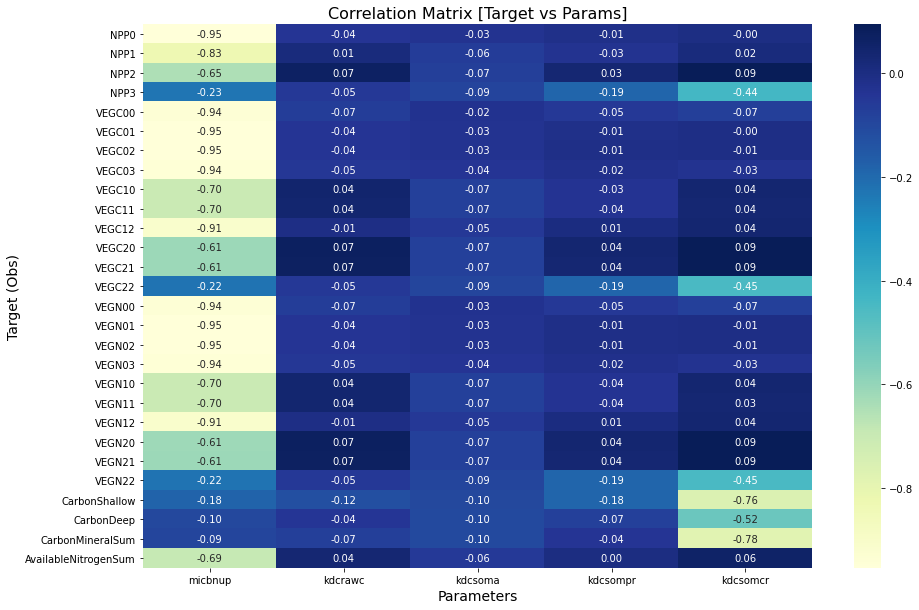

In [7]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

## SA STEP1

In [8]:
path='data/SA-MD1-STEP1/'
params='sample_matrix.csv'
model='results.txt'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

In [9]:
df_param.head()

cmax      cmax.1      cmax.2      cmax.3
0  304.672433  196.092846  288.617103  108.042352
1  171.394909   51.222722   61.658618  147.982790
2  442.861783  151.861485   49.029722  163.470253
3  583.949853   61.493824  103.332041   46.044853
4  261.797349  118.444634  187.567088   62.143091

In [10]:
df_model.head()

0          1          2          3
0  247.941825  43.630780  63.702678  62.791961
1  139.592580  10.593281  13.564094  83.261826
2  368.682895  32.804915  10.911346  95.112943
3  477.904659  13.882124  23.064703  26.608003
4  204.237388  25.607911  41.812459  36.036832

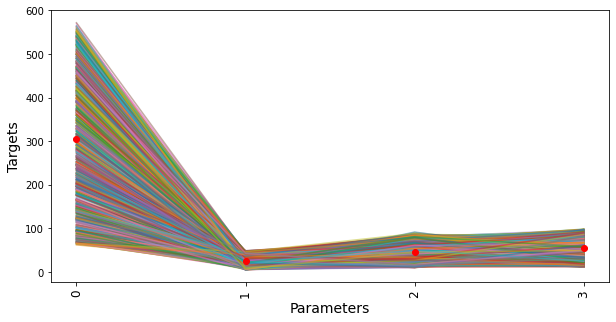

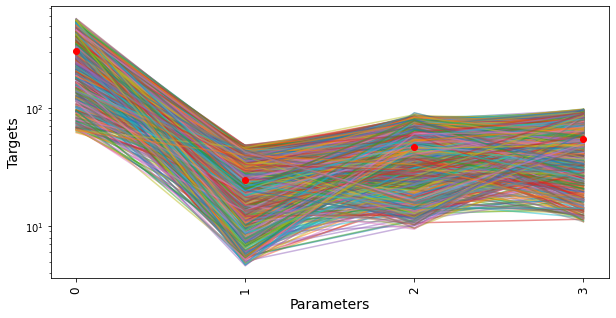

In [11]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

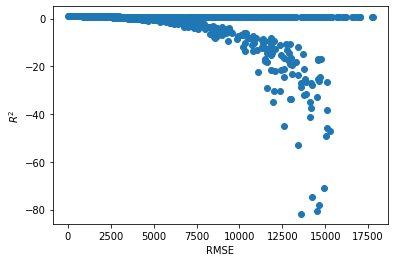

In [12]:
ut.plot_r2_rmse(df_model)

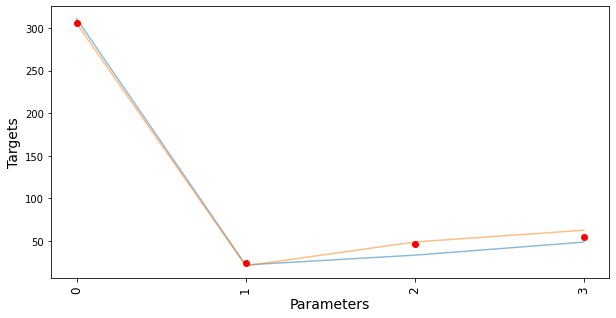

In [13]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.995)

In [14]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.99)
xparams.head()

cmax      cmax.1      cmax.2      cmax.3     $R^2$        RMSE  \
159  401.084608   66.986500  132.772630   74.991123  0.990927  137.694266   
301  374.264563  163.224555  272.216475   85.235885  0.991071  104.281946   
514  358.194990   97.847432  261.331152  100.095608  0.990697  105.896270   
564  391.831779  101.249319  148.838093   83.547785  0.995792   60.702547   
657  377.418294   93.451172  255.181043  123.748524  0.991805  106.063181   

         MAPE  
159  0.389823  
301  0.167460  
514  0.121087  
564  0.166110  
657  0.161733

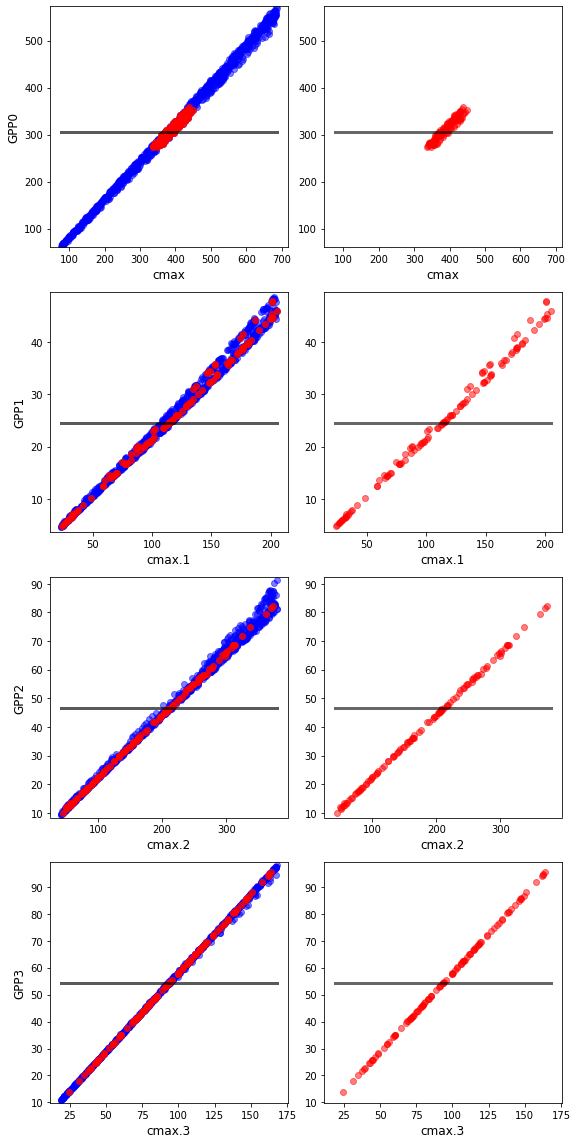

In [18]:
  
plot_param_target(df_param,df_model,r2lim=0.96)

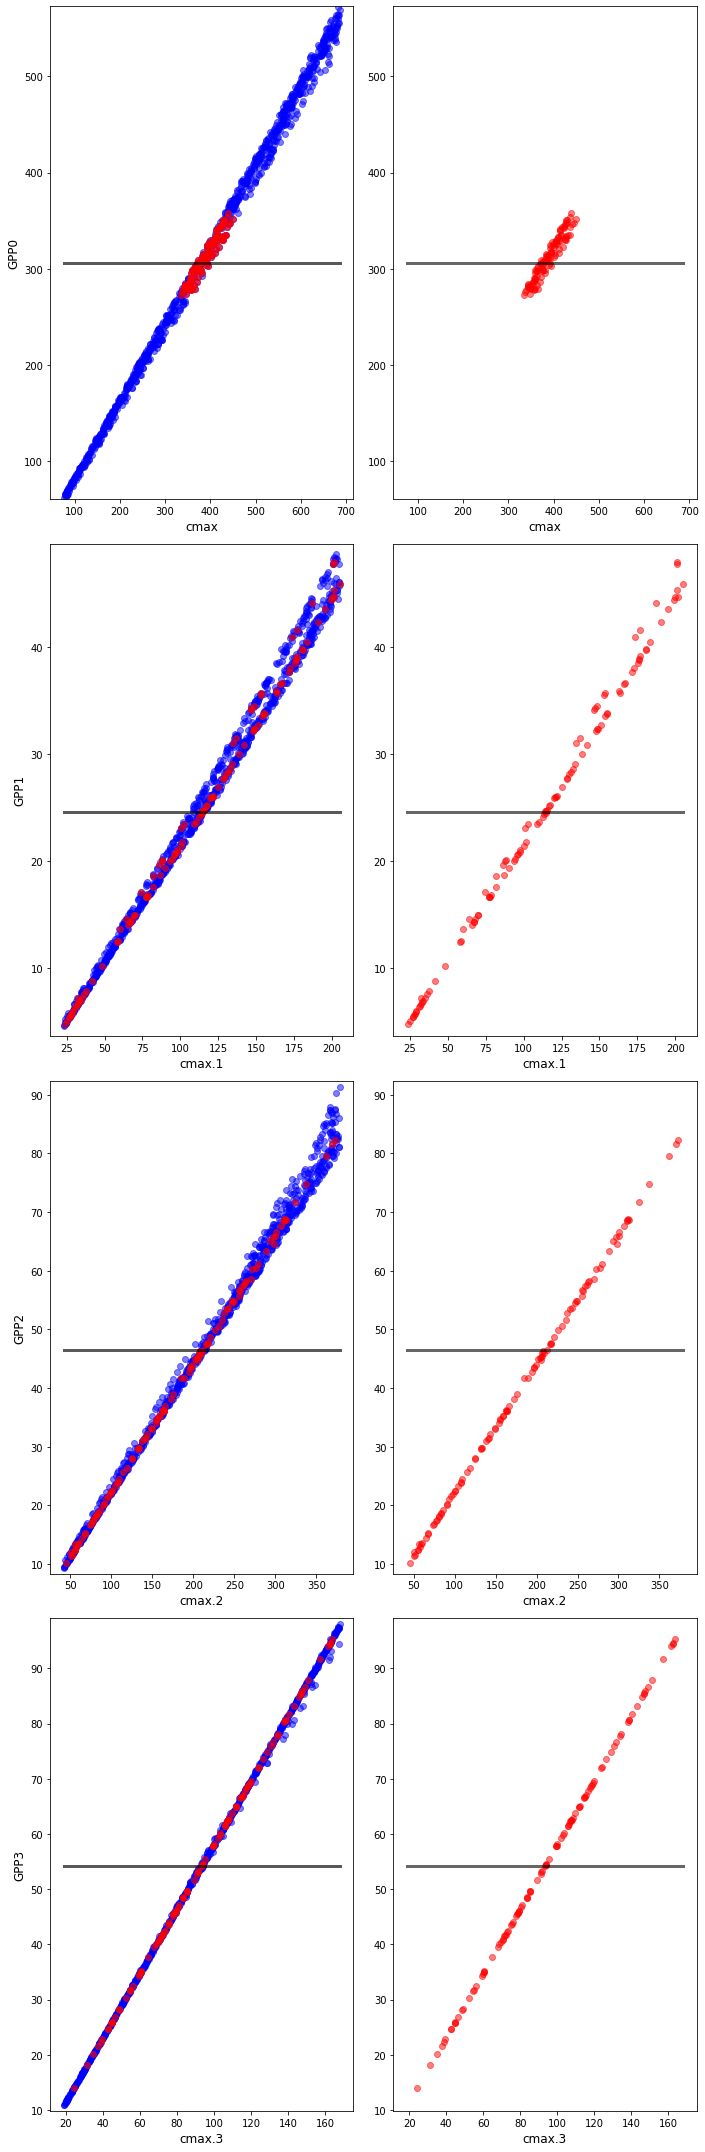

In [15]:
output_name = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = output_name

ut.plot_param_target(df_param,df_model,r2lim=0.96)

In [ ]:
this is dominate by the cmax0, how to grab other values assuming they are disjoint

In [2]:
path='MD1/csv/'
model='out_step1.csv'
params='param_step1.csv'
model='out_step2.csv'
params='param_step2.csv'
model='out_step2-old3.csv'
params='param_step2-old3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)